### Summary
<p>
This project employs the used cars data set from eBay "Kleinanzeigen", a classifieds section of the German eBay website. The goal of this project is to clean the data and analyze the used car listing by filtering, grouping and computing statistics and plots using general python and pandas techniques. Several functions, for loops and method chains are created. Pandas methods like groupby, hierarchial indexing and concatenate are applied. Visualization is done with matplotlib or the pandas implementation of matplotlib.
Insights and result are written below in the comments and markdown cells.
</p>

### Information on the data set "Used Car Listings on eBay Kleinanzeigen"



We will be working on a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.
The dataset was originally scraped and uploaded to Kaggle. The version of the dataset we are working with is a sample of 50,000 data points that was prepared by Dataquest including simulating a less-cleaned version of the data.


<p>
The data dictionary provided with data is as follows:
</p>

<ul>

<li>    dateCrawled - 
        When this ad was first crawled. All field-values are taken from this date.</li>
<li>    name - Name of the car.</li>
<li>    seller - Whether the seller is private or a dealer.</li>
<li>    offerType - The type of listing</li>
<li>    price - The price on the ad to sell the car.</li>
<li>    abtest - Whether the listing is included in an A/B test.</li>
<li>    vehicleType - The vehicle Type.</li>
<li>    yearOfRegistration - The year in which which year the car was first registered.</li>
<li>    gearbox - The transmission type.</li>
<li>    powerPS - The power of the car in PS.</li>
<li>    model - The car model name.</li>
<li>    kilometer - How many kilometers the car has driven.</li>
<li>    monthOfRegistration - The month in which which year the car was first registered.</li>
<li>    fuelType - What type of fuel the car uses.</li>
<li>    brand - The brand of the car.</li>
<li>    notRepairedDamage - If the car has a damage which is not yet repaired.</li>
<li>    dateCreated - The date on which the eBay listing was created.</li>
<li>    nrOfPictures - The number of pictures in the ad.</li>
<li>    postalCode - The postal code for the location of the vehicle.</li>
<li>    lastSeenOnline - When the crawler saw this ad last online.</li>

</ul>



### Importing packages and the data set

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(dpi=70)

<Figure size 420x280 with 0 Axes>

<Figure size 420x280 with 0 Axes>

In [4]:
from datetime import datetime

In [5]:
autos = pd.read_csv("autos.csv", encoding='Latin-1')

### Explorative Data Analysis - Look at the data

In [6]:
print(autos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [7]:
print(autos.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [8]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [9]:
print(autos.index)

RangeIndex(start=0, stop=371528, step=1)


In [10]:
print(autos.describe())

              price  yearOfRegistration        powerPS      kilometer  \
count  3.715280e+05       371528.000000  371528.000000  371528.000000   
mean   1.729514e+04         2004.577997     115.549477  125618.688228   
std    3.587954e+06           92.866598     192.139578   40112.337051   
min    0.000000e+00         1000.000000       0.000000    5000.000000   
25%    1.150000e+03         1999.000000      70.000000  125000.000000   
50%    2.950000e+03         2003.000000     105.000000  150000.000000   
75%    7.200000e+03         2008.000000     150.000000  150000.000000   
max    2.147484e+09         9999.000000   20000.000000  150000.000000   

       monthOfRegistration  nrOfPictures    postalCode  
count        371528.000000      371528.0  371528.00000  
mean              5.734445           0.0   50820.66764  
std               3.712412           0.0   25799.08247  
min               0.000000           0.0    1067.00000  
25%               3.000000           0.0   30459.00000  


In [11]:
print(autos.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


The dataset includes 5000 observation. The dataset index is a range index going from 0 to 4999. The dataset includes 20 variables of which 5 are of type integer and 15 of type object. These are mostly strings, but also three variables of type date are included. The date format is standar (Y-M-D H:M:S) The dataset includes None values. The columns names are written in camel case style.

In [12]:
# Make a copy of the variable names
autos_columns_copy = autos.columns.copy()

In [13]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [14]:
# laptops.rename({"ram":"ram_gb"}, axis=1, inplace=True)

dict_names = {'dateCrawled':'date_crawled',
              'offerType':'offer_Type',
              'fuelType':'fuel_type',
              'notRepairedDamage':'not_repaired_damage',
              'nrOfPictures':'nr_of_pictures',
              'postalCode':'postal_code',
              'powerPS':'power_PS',
              'lastSeen':'last_seen',
              'vehicleType':'vehicle_type',
              "yearOfRegistration":"registration_year",
              "monthOfRegistration":"registration_month",
              "notRepairedDamage":"unrepaired_damage",
             "dateCreated":"ad_created",
              "kilometer":"odometer"}

autos=autos.rename(columns = dict_names)

In [15]:
print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_Type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


The column names were change from camelcase to snakecase, because snakecase is better readable. Also some column names were exchanged to make these understandable.

In [16]:
print(autos.describe(include='all'))

               date_crawled         name  seller offer_Type         price  \
count                371528       371528  371528     371528  3.715280e+05   
unique               280500       233531       2          2           NaN   
top     2016-03-24 14:49:47  Ford_Fiesta  privat    Angebot           NaN   
freq                      7          657  371525     371516           NaN   
mean                    NaN          NaN     NaN        NaN  1.729514e+04   
std                     NaN          NaN     NaN        NaN  3.587954e+06   
min                     NaN          NaN     NaN        NaN  0.000000e+00   
25%                     NaN          NaN     NaN        NaN  1.150000e+03   
50%                     NaN          NaN     NaN        NaN  2.950000e+03   
75%                     NaN          NaN     NaN        NaN  7.200000e+03   
max                     NaN          NaN     NaN        NaN  2.147484e+09   

        abtest vehicle_type  registration_year  gearbox       power_PS  \
c

### Explore categorical variables like vehicle type by counting

In [17]:
print(autos.vehicle_type.value_counts())

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicle_type, dtype: int64


In [18]:
print(autos.name.value_counts())

Ford_Fiesta                                                        657
BMW_318i                                                           627
Opel_Corsa                                                         622
Volkswagen_Golf_1.4                                                603
BMW_316i                                                           523
BMW_320i                                                           492
Volkswagen_Polo                                                    475
Renault_Twingo                                                     447
Volkswagen_Golf                                                    428
Volkswagen_Golf_1.6                                                413
Volkswagen_Polo_1.2                                                412
BMW_116i                                                           394
Opel_Corsa_1.2_16V                                                 373
Opel_Corsa_B                                                       369
Opel_A

In [19]:
print(autos.offer_Type.value_counts())

Angebot    371516
Gesuch         12
Name: offer_Type, dtype: int64


In [20]:

print(autos.seller.value_counts())

privat        371525
gewerblich         3
Name: seller, dtype: int64


In [21]:

print(autos.abtest.value_counts())

test       192585
control    178943
Name: abtest, dtype: int64


In [22]:

print(autos.vehicle_type.value_counts())

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicle_type, dtype: int64


In [23]:
print(autos.gearbox.value_counts())

manuell      274214
automatik     77105
Name: gearbox, dtype: int64


In [24]:

# print(autos.odometer.apply(type).value_counts())
print(isinstance(autos.odometer[1], float))


False


In [25]:
print(autos['name'][1:5])
print(autos['name'].unique())

1              A5_Sportback_2.7_Tdi
2    Jeep_Grand_Cherokee_"Overland"
3                GOLF_4_1_4__3TÜRER
4    Skoda_Fabia_1.4_TDI_PD_Classic
Name: name, dtype: object
['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...,
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']


In [26]:
print(autos["price"].head())

0      480
1    18300
2     9800
3     1500
4     3600
Name: price, dtype: int64


### Data types

In [27]:

# dtypeCount =([df.iloc[:,i].apply(type).
# value_counts() for i in range(df.shape[1])])'''

dtype_Count = ([autos.iloc[:,i].apply(type).
               value_counts() for i in range(autos.shape[1])])
print(dtype_Count[:10])

[<class 'str'>    371528
Name: date_crawled, dtype: int64, <class 'str'>    371528
Name: name, dtype: int64, <class 'str'>    371528
Name: seller, dtype: int64, <class 'str'>    371528
Name: offer_Type, dtype: int64, <class 'int'>    371528
Name: price, dtype: int64, <class 'str'>    371528
Name: abtest, dtype: int64, <class 'str'>      333659
<class 'float'>     37869
Name: vehicle_type, dtype: int64, <class 'int'>    371528
Name: registration_year, dtype: int64, <class 'str'>      351319
<class 'float'>     20209
Name: gearbox, dtype: int64, <class 'int'>    371528
Name: power_PS, dtype: int64]


Any columns that have mostly one value that are candidates to be dropped:
offer_Type, seller

In [28]:
print(autos.dtypes)

date_crawled          object
name                  object
seller                object
offer_Type            object
price                  int64
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_PS               int64
model                 object
odometer               int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object


In [29]:
print(autos.info())
autos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_Type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
odometer              371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
ad_created            371528 non-null object
nr_of_pictures        371528 non-null int64
postal_code           371528 non-null int64
last_seen             371528 non-null obj

,price,registration_year,power_PS,odometer,registration_month,nr_of_pictures,postal_code
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


There are a number of text columns where almost all of the values are the same (seller and offer_type). Price and odometer are string columns but are numerical variables. Cleaning and conversion are necessary for price and odometer.

### Clean data

In [30]:
# Clean and convert price column

# Make a new data frame

auto_6546 = autos

print(auto_6546["price"].head())

# Check data
print(auto_6546 ["price"].nunique())
print(auto_6546 ["price"].dtype)
print(auto_6546 ["price"].head())



0      480
1    18300
2     9800
3     1500
4     3600
Name: price, dtype: int64
5597
int64
0      480
1    18300
2     9800
3     1500
4     3600
Name: price, dtype: int64


In [31]:
# Check columns where all or almost all values are the 
# same with a enumerate loop

# print(autos_names = list(autos))
# print(autos_names)
# print(autos.columns)

autos_nunique = dict()

for name, column in enumerate(auto_6546.columns):
    print(auto_6546.columns[name],":" , auto_6546[column].nunique())
    
autos_nunique = dict()    

# Doing similar with a dictionary

for name, column in enumerate(auto_6546.columns):
    autos_nunique[auto_6546.columns[name]] =  auto_6546[column].nunique()
    
print(autos_nunique)


autos_nunique_2 = dict()    


date_crawled : 280500
name : 233531
seller : 2
offer_Type : 2
price : 5597
abtest : 2
vehicle_type : 8
registration_year : 155
gearbox : 2
power_PS : 794
model : 251
odometer : 13
registration_month : 13
fuel_type : 7
brand : 40
unrepaired_damage : 2
ad_created : 114
nr_of_pictures : 1
postal_code : 8150
last_seen : 182806
{'date_crawled': 280500, 'name': 233531, 'seller': 2, 'offer_Type': 2, 'price': 5597, 'abtest': 2, 'vehicle_type': 8, 'registration_year': 155, 'gearbox': 2, 'power_PS': 794, 'model': 251, 'odometer': 13, 'registration_month': 13, 'fuel_type': 7, 'brand': 40, 'unrepaired_damage': 2, 'ad_created': 114, 'nr_of_pictures': 1, 'postal_code': 8150, 'last_seen': 182806}


In [32]:
# # It seems nr_of_pictures contains only one unique value
print(auto_6546.loc[0:5, "nr_of_pictures"])
print(auto_6546["nr_of_pictures"].unique())


0    0
1    0
2    0
3    0
4    0
5    0
Name: nr_of_pictures, dtype: int64
[0]


In [33]:

# Delete colum nr_of_pictures

auto_6546= auto_6546.drop("nr_of_pictures",  axis=1)

list(auto_6546)

['date_crawled',
 'name',
 'seller',
 'offer_Type',
 'price',
 'abtest',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power_PS',
 'model',
 'odometer',
 'registration_month',
 'fuel_type',
 'brand',
 'unrepaired_damage',
 'ad_created',
 'postal_code',
 'last_seen']

In [34]:
# abtest is a categorical variable
auto_6546["abtest"].unique()
# unrepaired_damage is a categorical variable
# Also many na values exist
print(auto_6546["unrepaired_damage"].unique())
print(auto_6546["unrepaired_damage"].isnull().sum())

# gearbox is a categorical variable
# Also many na values exist
print(auto_6546["gearbox"].unique())
print(auto_6546["gearbox"].isnull().sum())

[nan 'ja' 'nein']
72060
['manuell' 'automatik' nan]
20209


In [35]:
# Rename price and odometer making units clear
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

auto_6546=(auto_6546.rename(columns={'price':'price_Dollar', 
                             'odometer':'odometer_km'}))

print(auto_6546.columns)

Index(['date_crawled', 'name', 'seller', 'offer_Type', 'price_Dollar',
       'abtest', 'vehicle_type', 'registration_year', 'gearbox', 'power_PS',
       'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen'],
      dtype='object')


#### Change german with english words in the categorical variables

In [36]:
mapping_dict_666 = {"Angebot":"offer", "Gesuch":"request"}

auto_6546['offer_Type'] = auto_6546['offer_Type'].map(mapping_dict_666)

auto_6546['offer_Type'].unique()


array(['offer', 'request'], dtype=object)

In [37]:
# auto_6546["gearbox"].unique()

mapping_dict_555 = {"manuell":"manual", "automatik":"automatic"}

auto_6546["gearbox"] = auto_6546["gearbox"].map(mapping_dict_555)

auto_6546["gearbox"].unique()



array(['manual', 'automatic', nan], dtype=object)

In [38]:
# auto_6546['fuel_type'].unique()
mapping_dict_999 = {'lpg':'lpg', "benzin":"gasoline", "elektro":"elektric",
                    "andere":"others", 'diesel':'diesel', 'cng':'cng',
                    'hybrid':'hybrid'}



auto_6546['fuel_type'] = auto_6546['fuel_type'].map(mapping_dict_999)

print(auto_6546['fuel_type'].unique())


mapping_dict_999 = {"benzin":"gasoline", "elektro":"elektric", "andere":"others"}

auto_6546['fuel_type'] = auto_6546['fuel_type'].map(mapping_dict_999)

print(auto_6546['fuel_type'].unique())



['gasoline' 'diesel' nan 'lpg' 'others' 'hybrid' 'cng' 'elektric']
[nan]


#### Convert date columns into datetime objects

In [39]:

# Test 
# Convert dates as strings into date as dates

auto_6546['date_crawled'].head()

print(type(auto_6546['date_crawled']))

date_strptime_test = auto_6546['date_crawled'][0]

# '%y/%m/%d/ %H:%M:%S'
date_strptime_test  = datetime.strptime(date_strptime_test, 
                                        '%Y-%m-%d %H:%M:%S')

print(date_strptime_test)
print(type(date_strptime_test))


import time

date_utc = time.mktime(date_strptime_test.timetuple())

print("String to datetime to float: ", date_utc )
print(type(date_utc ))
print("From timestamp: ", datetime.utcfromtimestamp(date_utc ))

<class 'pandas.core.series.Series'>
2016-03-24 11:52:17
<class 'datetime.datetime'>
String to datetime to float:  1458816737.0
<class 'float'>
From timestamp:  2016-03-24 10:52:17


In [40]:
# .strptime() method converts from a string to a datetime object

auto_888 = auto_6546


date_crawled_dt_list = list()

for i,every_date in enumerate(auto_888['date_crawled']):
    date_dt =datetime.strptime(every_date,'%Y-%m-%d %H:%M:%S' )
    date_crawled_dt_list.append(date_dt)

print(date_crawled_dt_list[1:3] )




[datetime.datetime(2016, 3, 24, 10, 58, 45), datetime.datetime(2016, 3, 14, 12, 52, 21)]


In [41]:
date_crawled_dt_series = pd.Series(date_crawled_dt_list)

print(date_crawled_dt_series[1:3])

auto_888['date_crawled'] = date_crawled_dt_series

print(auto_888['date_crawled'][1:4])

1   2016-03-24 10:58:45
2   2016-03-14 12:52:21
dtype: datetime64[ns]
1   2016-03-24 10:58:45
2   2016-03-14 12:52:21
3   2016-03-17 16:54:04
Name: date_crawled, dtype: datetime64[ns]


In [42]:
# Convert datetime objects into UTC floats
date_crawled_utc = list()

for i,every_date in enumerate(auto_888['date_crawled']):
    date_utc = time.mktime(every_date.timetuple())
    date_crawled_utc.append(date_utc )
    
date_crawled_utc[0:5]
date_crawled_utc_series = pd.Series(date_crawled_utc)
print(date_crawled_utc_series[0:5])

0    1.458817e+09
1    1.458814e+09
2    1.457956e+09
3    1.458230e+09
4    1.459438e+09
dtype: float64


In [43]:
# Convert last seen as string into datetime, 
# utc and store it into a list and then pandas series

ls_list_dt = []
ls = auto_888['last_seen']
for date in ls:
    date_dt =datetime.strptime(date,'%Y-%m-%d %H:%M:%S' )
    date_utc = time.mktime(date_dt.timetuple())
    ls_list_dt.append(date_utc )
    
print(ls_list_dt[0:4])

ls_list_dt_series = pd.Series(ls_list_dt)

print(ls_list_dt_series[0:5])

# possible to create a function 
# doing this with a date columns stored as strings

[1459991817.0, 1459986410.0, 1459853266.0, 1458232817.0]
0    1.459992e+09
1    1.459986e+09
2    1.459853e+09
3    1.458233e+09
4    1.459931e+09
dtype: float64


### Price variable

In [44]:
# Explore price 
print(auto_6546['price_Dollar'].unique())
print(auto_6546['price_Dollar'].describe())
print(auto_6546['price_Dollar'].value_counts().
      sort_index(ascending=True).head(n=20))
print(auto_6546['price_Dollar'].value_counts().
      sort_index(ascending=True).tail(n=20))





[  480 18300  9800 ..., 18429 24895 10985]
count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price_Dollar, dtype: float64
0     10778
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
Name: price_Dollar, dtype: int64
1234566        1
1250000        2
1300000        1
1600000        2
2795000        1
2995000        1
3890000        1
3895000        1
9999999        3
10000000       8
10010011       1
11111111      10
12345678       9
14000500       1
27322222       1
32545461       1
74185296       1
99000000       1
99999999      15
2147483647     1
Name: price_Dollar, dtype: int64


In [45]:

print("Length of price vector: ", len(auto_6546['price_Dollar']))


Length of price vector:  371528


In [46]:
print(auto_6546['price_Dollar'].isnull().sum())

0


In [47]:
# Computing statistics

auto_22 = auto_6546['price_Dollar']

print("Maximal price: ", max(auto_22))
print("Minimum price: ", min(auto_22))
print("Average: ", auto_22.mean())
print("Standard Deviation: ", auto_22.std())
print("Median: ", auto_22.quantile(q=0.5))



Maximal price:  2147483647
Minimum price:  0
Average:  17295.14186548524
Standard Deviation:  3587953.7444104245
Median:  2950.0


In [48]:
# Calculating quantiles and IQR
quantile_22 = auto_6546['price_Dollar'].quantile(q=[0, 0.25, 0.5, 0.75, 1])

print(quantile_22)

0.00    0.000000e+00
0.25    1.150000e+03
0.50    2.950000e+03
0.75    7.200000e+03
1.00    2.147484e+09
Name: price_Dollar, dtype: float64


In [49]:
# Determining outliers
# DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

# 1.5 * IQR (IQR = Q3 - Q1)

iqr_22 = 1.5 * (7200.0 - 1100.0)

print(iqr_22)

# Q1 - 1.5 * IQR

outliers_low = 1100.0 - 1.5 * iqr_22
outliers_up =  7200 + 1.5 * iqr_22

print("Outliers lower bound: ", outliers_low)
print("Outliers upper bound: ", outliers_up)

# Lower bound makes no sense
# Negative values would the buyer would pay

9150.0
Outliers lower bound:  -12625.0
Outliers upper bound:  20925.0


In [50]:
# Count the frequency of the price data points
# Look more specifically into it

print(auto_6546['price_Dollar'].value_counts().
      sort_values(ascending=True).head(n=20))

print(auto_6546['price_Dollar'].value_counts().
      sort_values(ascending=False).head(n=20))

print(auto_6546['price_Dollar'].value_counts().
      sort_values(ascending=False).tail(n=20))

8188     1
6370     1
4835     1
6170     1
51200    1
23530    1
33777    1
68800    1
9445     1
93900    1
11549    1
24298    1
27925    1
21778    1
17680    1
26349    1
281      1
33289    1
76997    1
78911    1
Name: price_Dollar, dtype: int64
0       10778
500      5670
1500     5394
1000     4649
1200     4594
2500     4438
600      3819
3500     3792
800      3784
2000     3432
999      3364
750      3203
650      3150
4500     3053
850      2946
2200     2936
700      2936
1800     2886
900      2874
950      2793
Name: price_Dollar, dtype: int64
78911    1
76997    1
33289    1
281      1
26349    1
17680    1
21778    1
27925    1
24298    1
11549    1
93900    1
9445     1
68800    1
33777    1
23530    1
51200    1
6170     1
4835     1
6370     1
8188     1
Name: price_Dollar, dtype: int64


Text(0.5, 1.0, 'Boxplot')

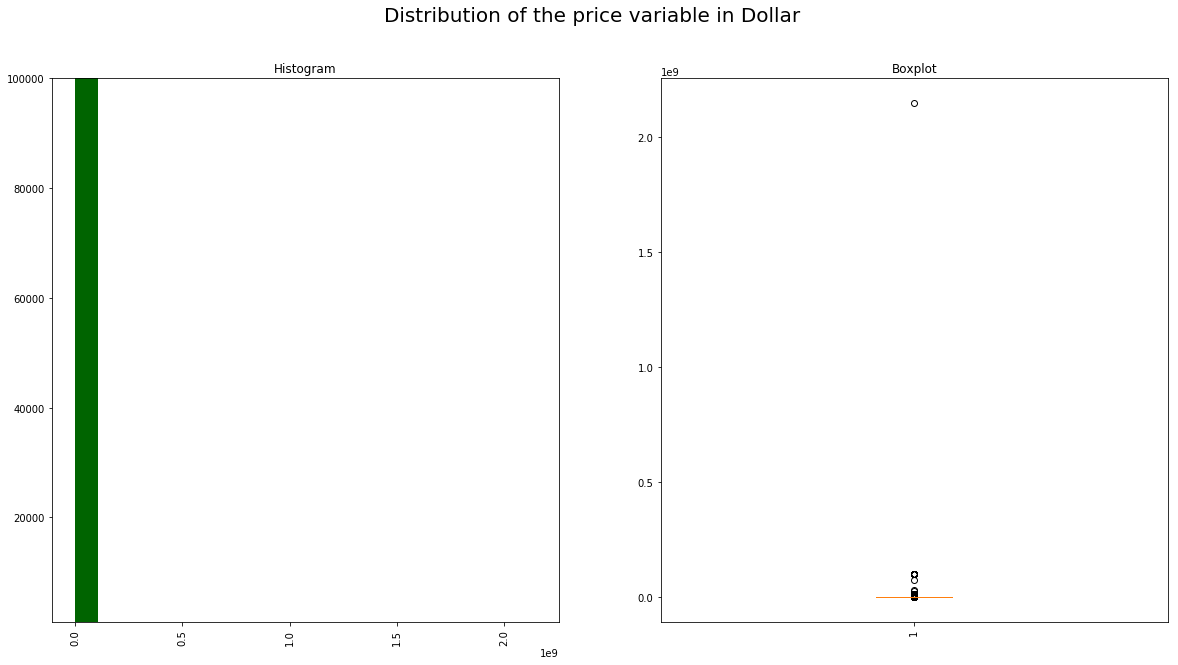

In [51]:

y_6323=auto_6546['price_Dollar']


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

        
ax1.hist(y_6323, bins=20, color='darkgreen')
ax1.set_ylim([1000,100000])
ax2.boxplot(y_6323)


fig.suptitle("Distribution of the price variable in Dollar", fontsize=20)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')


# Does the price = 0 values distort the distribution?

### Clean the price variable using different approaches

In [52]:
# Remove price = 0
# Set a filter range between two values

auto_111 = auto_6546
auto_112 = auto_111[auto_111["price_Dollar"].between(100,30000)]

auto_112["price_Dollar"].value_counts().sort_index().head()
# successfully 0 removed

100    1032
101       4
105       3
106       1
108       1
Name: price_Dollar, dtype: int64

### Understanding the price variable by it's distribution

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Boxplot')

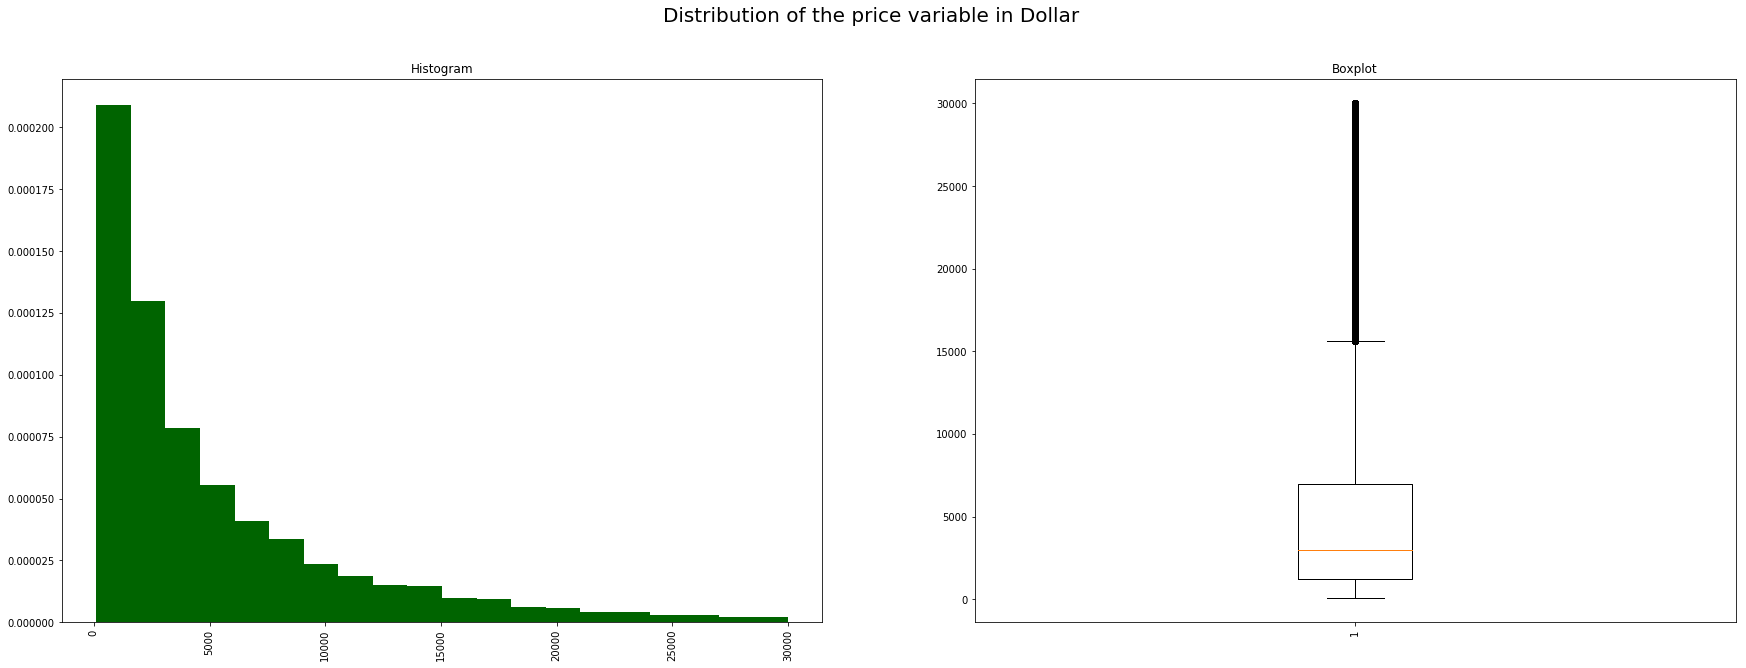

In [53]:
y_112=auto_112['price_Dollar']


fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
        
ax1.hist(y_112, bins=20, color='darkgreen', normed=1)
ax2.boxplot(y_112)


fig.suptitle("Distribution of the price variable in Dollar", fontsize=20)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')



### Explore odometer by computing statistics, distribution and visualizations

In [54]:
# Explore odometer_km
# Which data frame is used?
# auto_6546 = autos
# auto_6546.columns

odo_333 = auto_6546["odometer_km"]
# Check
print(odo_333.head())
type((odo_333))

0    150000
1    125000
2    125000
3    150000
4     90000
Name: odometer_km, dtype: int64


pandas.core.series.Series

#### Explore odometer_km

In [55]:

# Explore column type numerical of a data frame

print(odo_333.unique())
print(odo_333.describe())
print(odo_333.value_counts().
      sort_index(ascending=True).head(n=20))
print(odo_333.value_counts().
      sort_index(ascending=True).tail(n=20))
print(odo_333.isnull().sum())
print("Length of price vector: ", len(odo_333))



[150000 125000  90000  40000  30000  70000   5000 100000  60000  20000
  80000  50000  10000]
count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
Name: odometer_km, dtype: int64
5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
Name: odometer_km, dtype: int64
0
Length of price vector:  371528


### Computing statistics

In [56]:
# Computing statistics
# Make a function
# Input: pandas series or column of a data frame
# def functionname( parameters ):

def calc_stats(series):
    odo_stats = {}
    odo_stats["Average"] = series.mean()
    odo_stats["Maximum"] = series.max()
    odo_stats["Minimum"] = series.min()
    odo_stats["Median"] = series.quantile(q=0.5)
    odo_stats["Standard Deviation"] = series.std()
    
    return(odo_stats)

print(calc_stats(odo_333))



{'Average': 125618.68822807433, 'Maximum': 150000, 'Minimum': 5000, 'Median': 150000.0, 'Standard Deviation': 40112.33705087358}


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Boxplot')

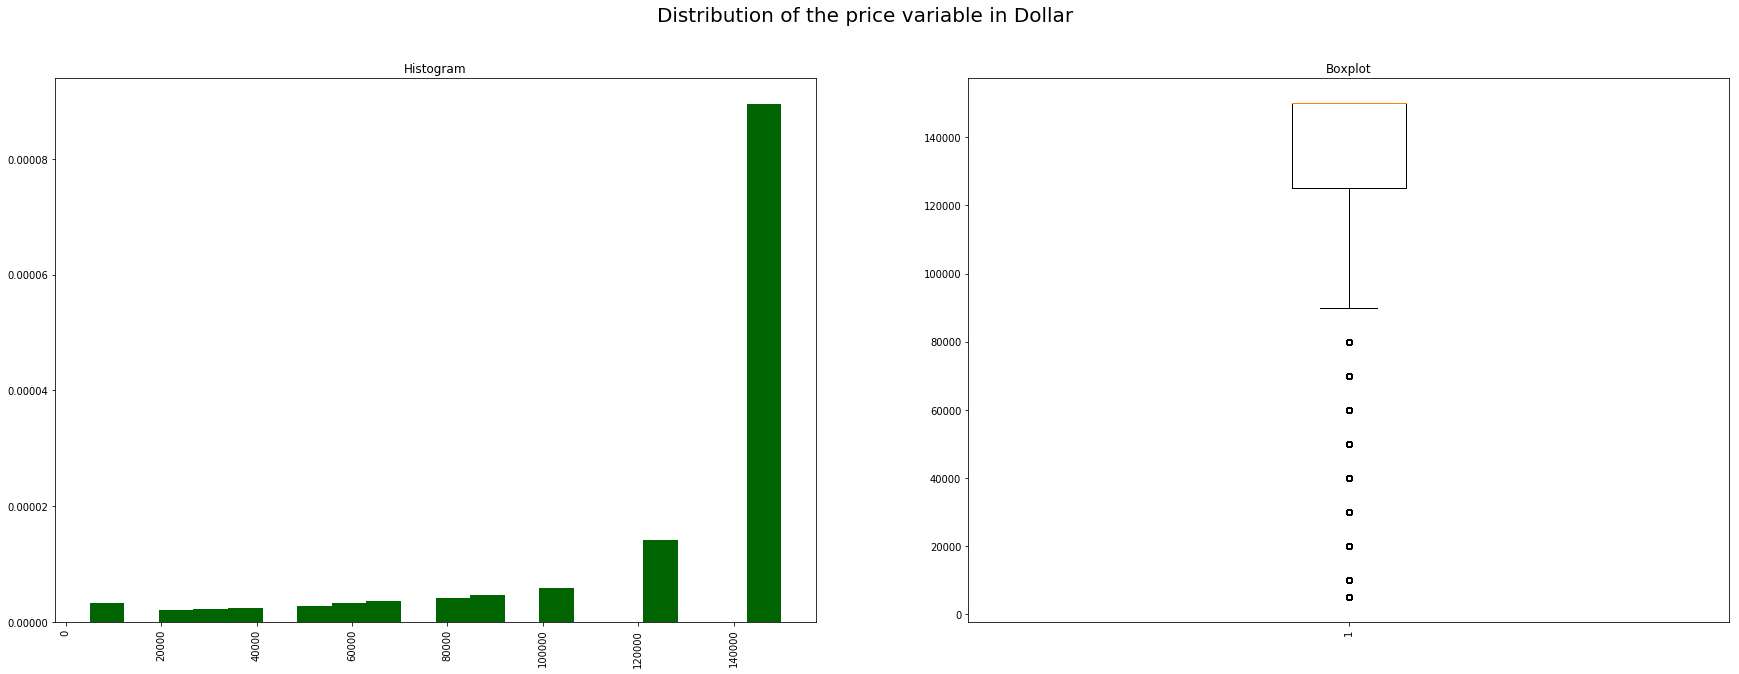

In [57]:

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
        
ax1.hist(odo_333, bins=20, color='darkgreen', normed=1)
ax2.boxplot(odo_333)


fig.suptitle("Distribution of the price variable in Dollar", fontsize=20)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')



In [58]:
# Computing statistics
# Writing a function computing iqr and outliers

def iqr_outliers(series):
    
    iqr_outliers = {}
    
    q1 = series.quantile(q=0.25)
    q3 = series.quantile(q=0.75)
    q2 = series.quantile(q=0.50)
    
    iqr_outliers["Quantile - 25%"] = q1
    iqr_outliers["Quantile - 75%"] = q3
    iqr_outliers["Median - 50%"] = q2
    
    iqr = q3 - q1
    
    iqr_outliers["iqr"] = iqr
    
    outliers_lower_bound = q1 - 1.5 * iqr
    outliers_upper_bound = q3 + 1.5 * iqr
    
    iqr_outliers["outliers_lower_bound"] = outliers_lower_bound
    iqr_outliers["outliers_upper_bound"] = outliers_upper_bound
    
    return(iqr_outliers)

print(iqr_outliers(odo_333))

odo_333_dict = iqr_outliers(odo_333)

print(odo_333_dict['outliers_lower_bound'], odo_333_dict["outliers_upper_bound"])

{'Quantile - 25%': 125000.0, 'Quantile - 75%': 150000.0, 'Median - 50%': 150000.0, 'iqr': 25000.0, 'outliers_lower_bound': 87500.0, 'outliers_upper_bound': 187500.0}
87500.0 187500.0


In [59]:
# Use the IQR to remove outliers
# Set a filter range between two values

auto_333 = (auto_6546[odo_333.between
                     (odo_333_dict['outliers_lower_bound'],
                      odo_333_dict["outliers_upper_bound"])])

# Check
print(auto_333["odometer_km"].value_counts().sort_index().head())
print(min(auto_333["odometer_km"]))
print(max(auto_333["odometer_km"]))

90000      12523
100000     15920
125000     38067
150000    240797
Name: odometer_km, dtype: int64
90000
150000


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Boxplot')

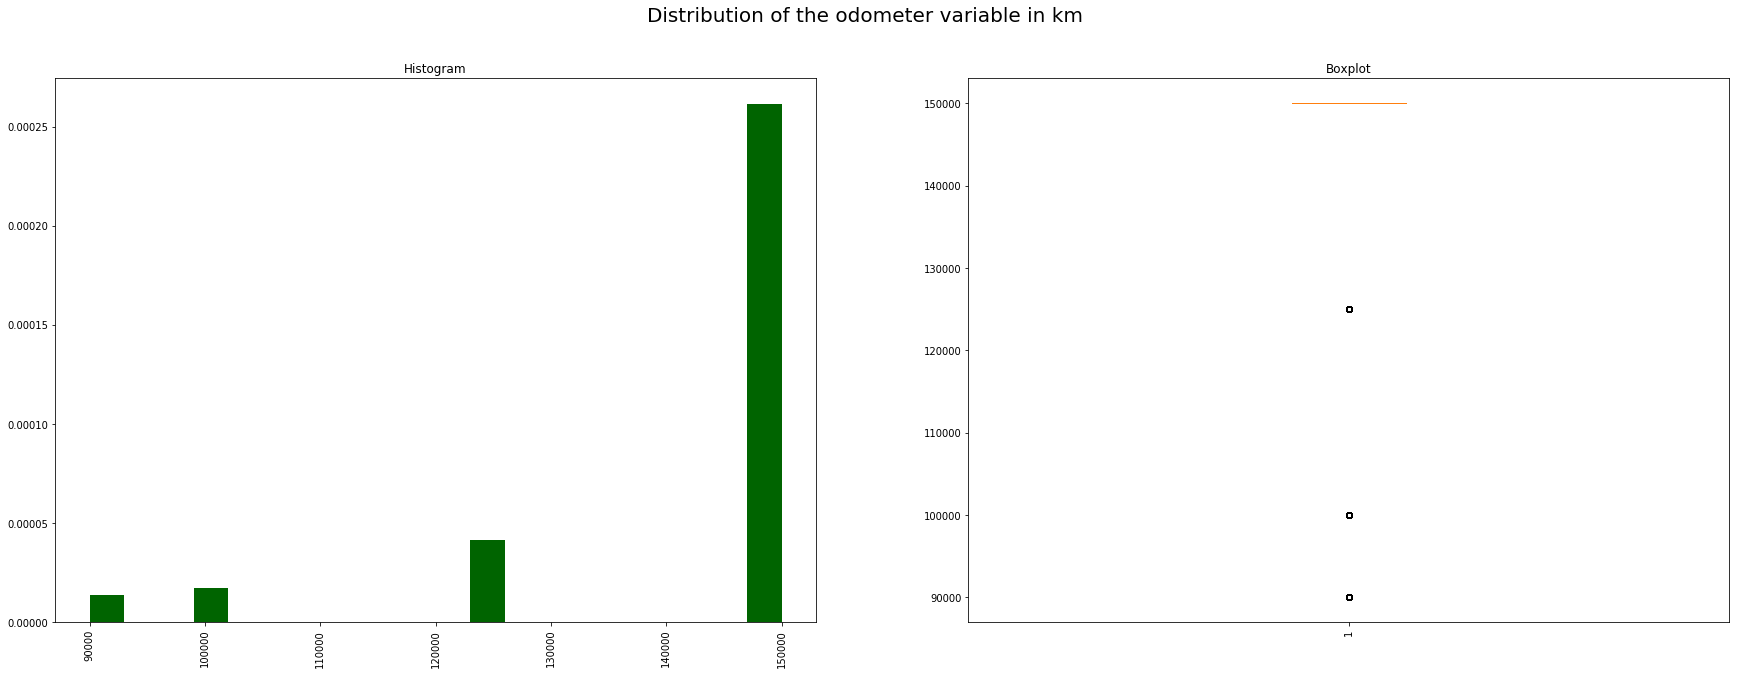

In [60]:
y_333=auto_333["odometer_km"]


fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
        
ax1.hist(y_333, bins=20, color='darkgreen', normed=1)
ax2.boxplot(y_333)


fig.suptitle("Distribution of the odometer variable in km", fontsize=20)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')



In [61]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_Type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
odometer              371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
ad_created            371528 non-null object
nr_of_pictures        371528 non-null int64
postal_code           371528 non-null int64
last_seen             371528 non-null obj

### Explore the date columns

In [62]:

# Select the date columns
auto_date = autos
auto_date = auto_date[["date_crawled", "ad_created", "last_seen"]]

auto_date.head()

,date_crawled,ad_created,last_seen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


#### Explore date_crawled

In [63]:


print(auto_date["date_crawled"].head())

date_day =(auto_date["date_crawled"].apply(str).str[:10])
print(date_day.iloc[1:10,])


0    2016-03-24 11:52:17
1    2016-03-24 10:58:45
2    2016-03-14 12:52:21
3    2016-03-17 16:54:04
4    2016-03-31 17:25:20
Name: date_crawled, dtype: object
1    2016-03-24
2    2016-03-14
3    2016-03-17
4    2016-03-31
5    2016-04-04
6    2016-04-01
7    2016-03-21
8    2016-04-04
9    2016-03-17
Name: date_crawled, dtype: object


In [64]:

auto_date_999 = auto_date
auto_date_999["date_crawled"]=auto_date_999["date_crawled"].astype('datetime64[ns]')
print(auto_date_999.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 3 columns):
date_crawled    371528 non-null datetime64[ns]
ad_created      371528 non-null object
last_seen       371528 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 8.5+ MB
None


C:\Users\gamarandor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


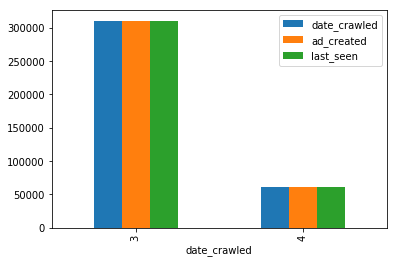

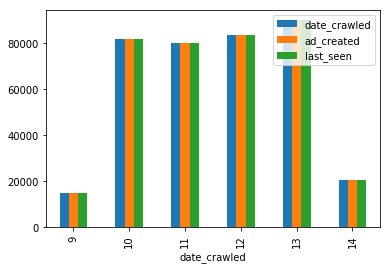

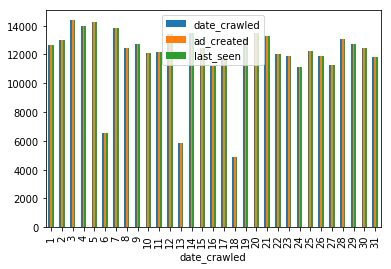

In [65]:
type(auto_date_999["date_crawled"])


# df.groupby(df["date"].dt.month).count().plot(kind="bar")

auto_date_999.groupby(auto_date_999["date_crawled"].
                      dt.month).count().plot(kind="bar")

auto_date_999.groupby(auto_date_999["date_crawled"].
                      dt.week).count().plot(kind="bar")

auto_date_999.groupby(auto_date_999["date_crawled"].
                      dt.day).count().plot(kind="bar")

2016-03-05     9493
2016-03-06     5373
2016-03-07    13260
2016-03-08    12429
2016-03-09    12710
2016-03-10    12098
2016-03-11    12159
2016-03-12    13447
2016-03-13     5846
2016-03-14    13477
2016-03-15    12428
2016-03-16    11201
2016-03-17    11763
2016-03-18     4877
2016-03-19    13112
2016-03-20    13506
2016-03-21    13278
2016-03-22    12063
2016-03-23    11878
2016-03-24    11113
2016-03-25    12236
2016-03-26    11876
2016-03-27    11248
2016-03-28    13045
2016-03-29    12695
2016-03-30    12457
2016-03-31    11846
2016-04-01    12675
2016-04-02    13033
2016-04-03    14391
2016-04-04    13974
2016-04-05     4764
2016-04-06     1175
2016-04-07      602
Name: date_crawled, dtype: int64
<class 'pandas.core.series.Series'>
34
AxesSubplot(0.125,0.125;0.775x0.755)


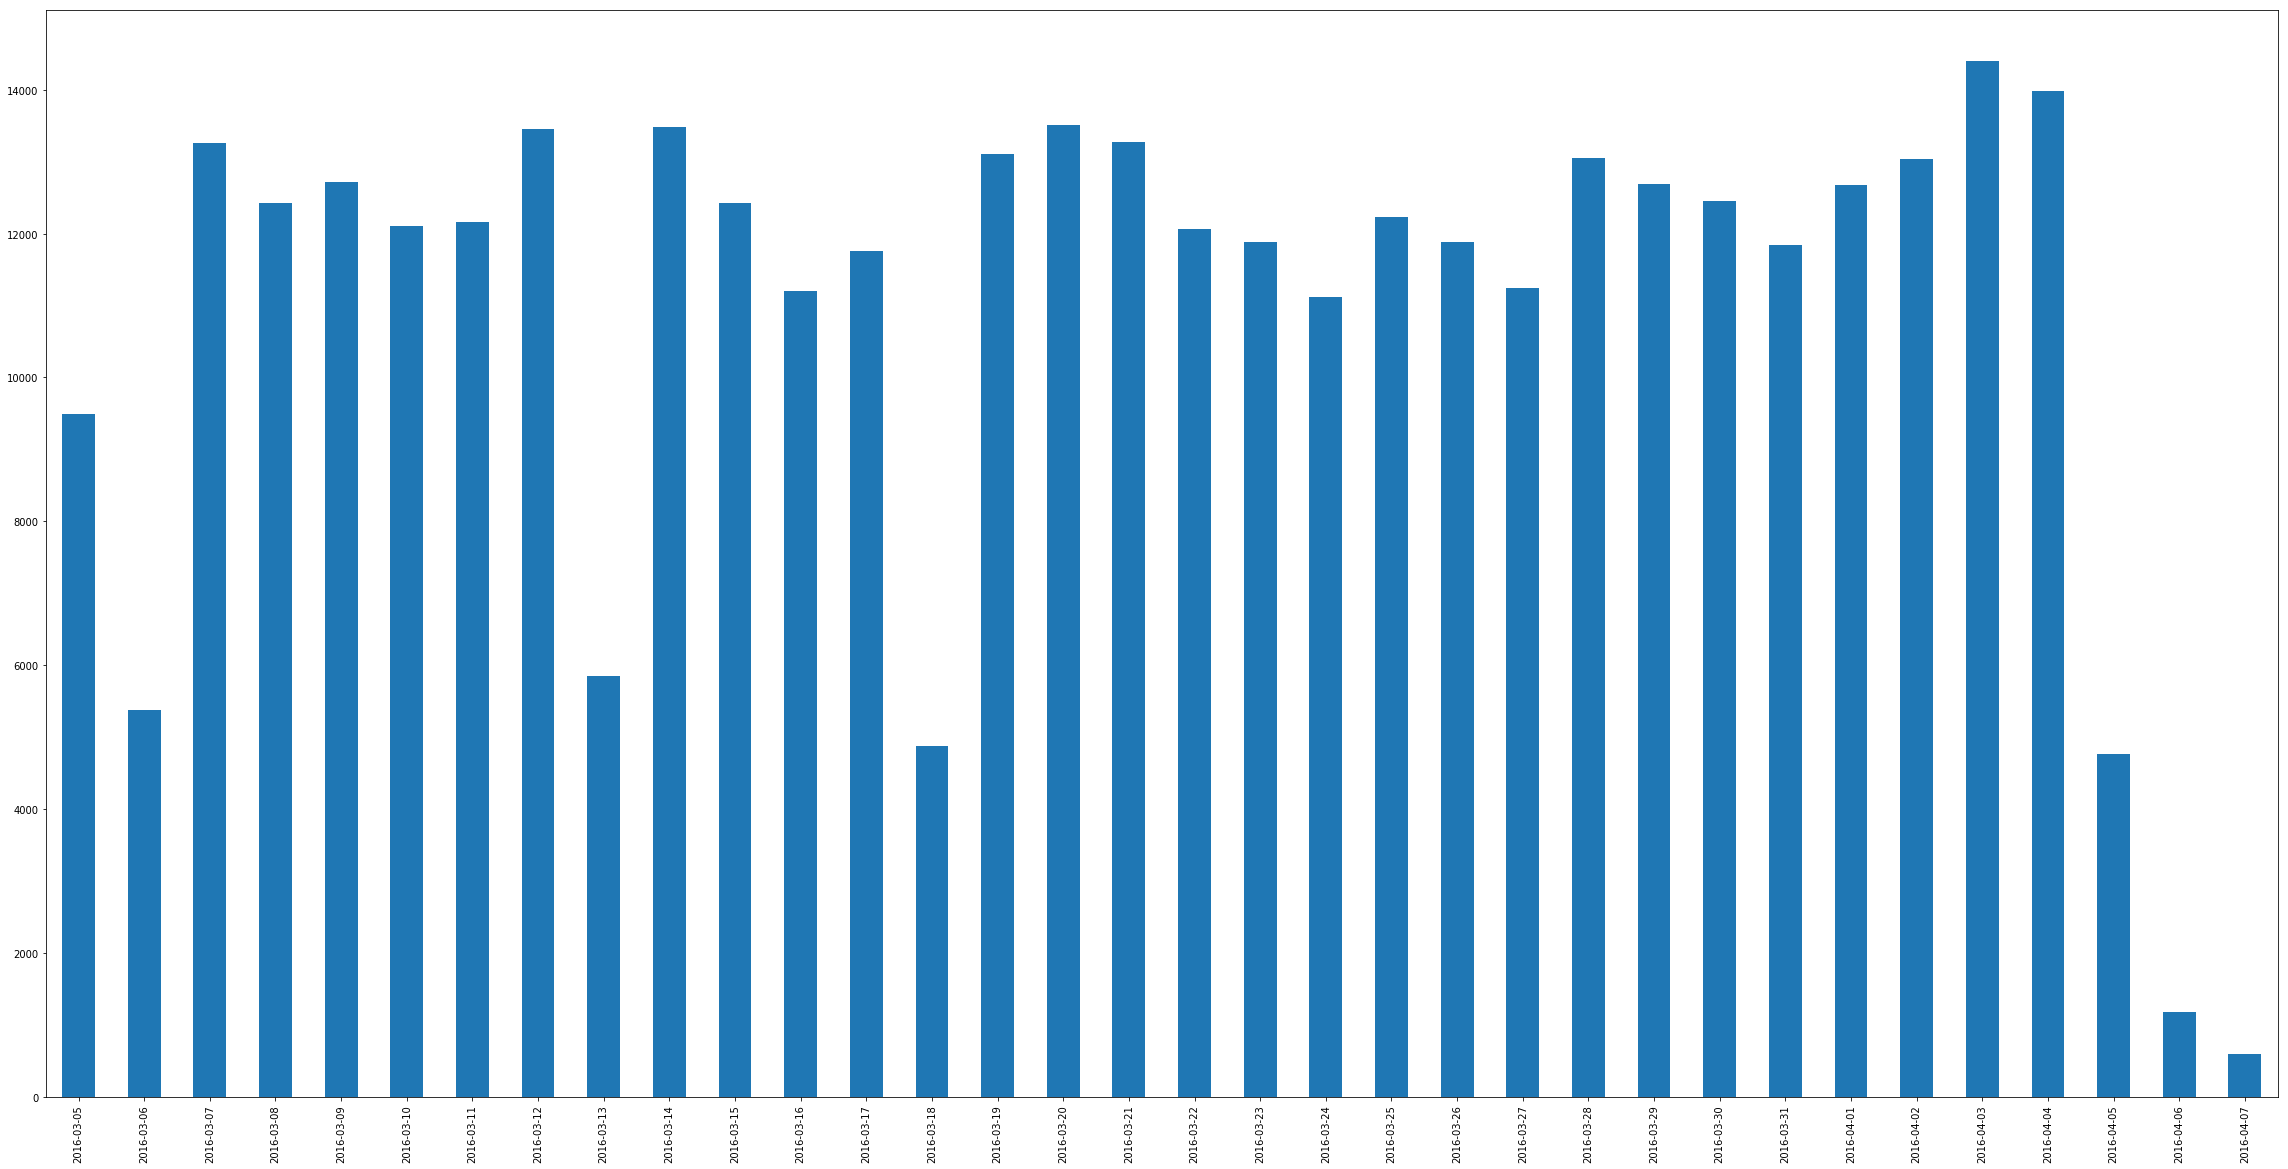

In [66]:

date_day_dis = date_day.value_counts().sort_index(inplace=False)

print(date_day_dis )

print(type(date_day_dis))
print(len(date_day_dis))


print(date_day_dis.plot(kind="bar", rot=90, figsize=(40, 20)))


AxesSubplot(0.125,0.125;0.775x0.755)


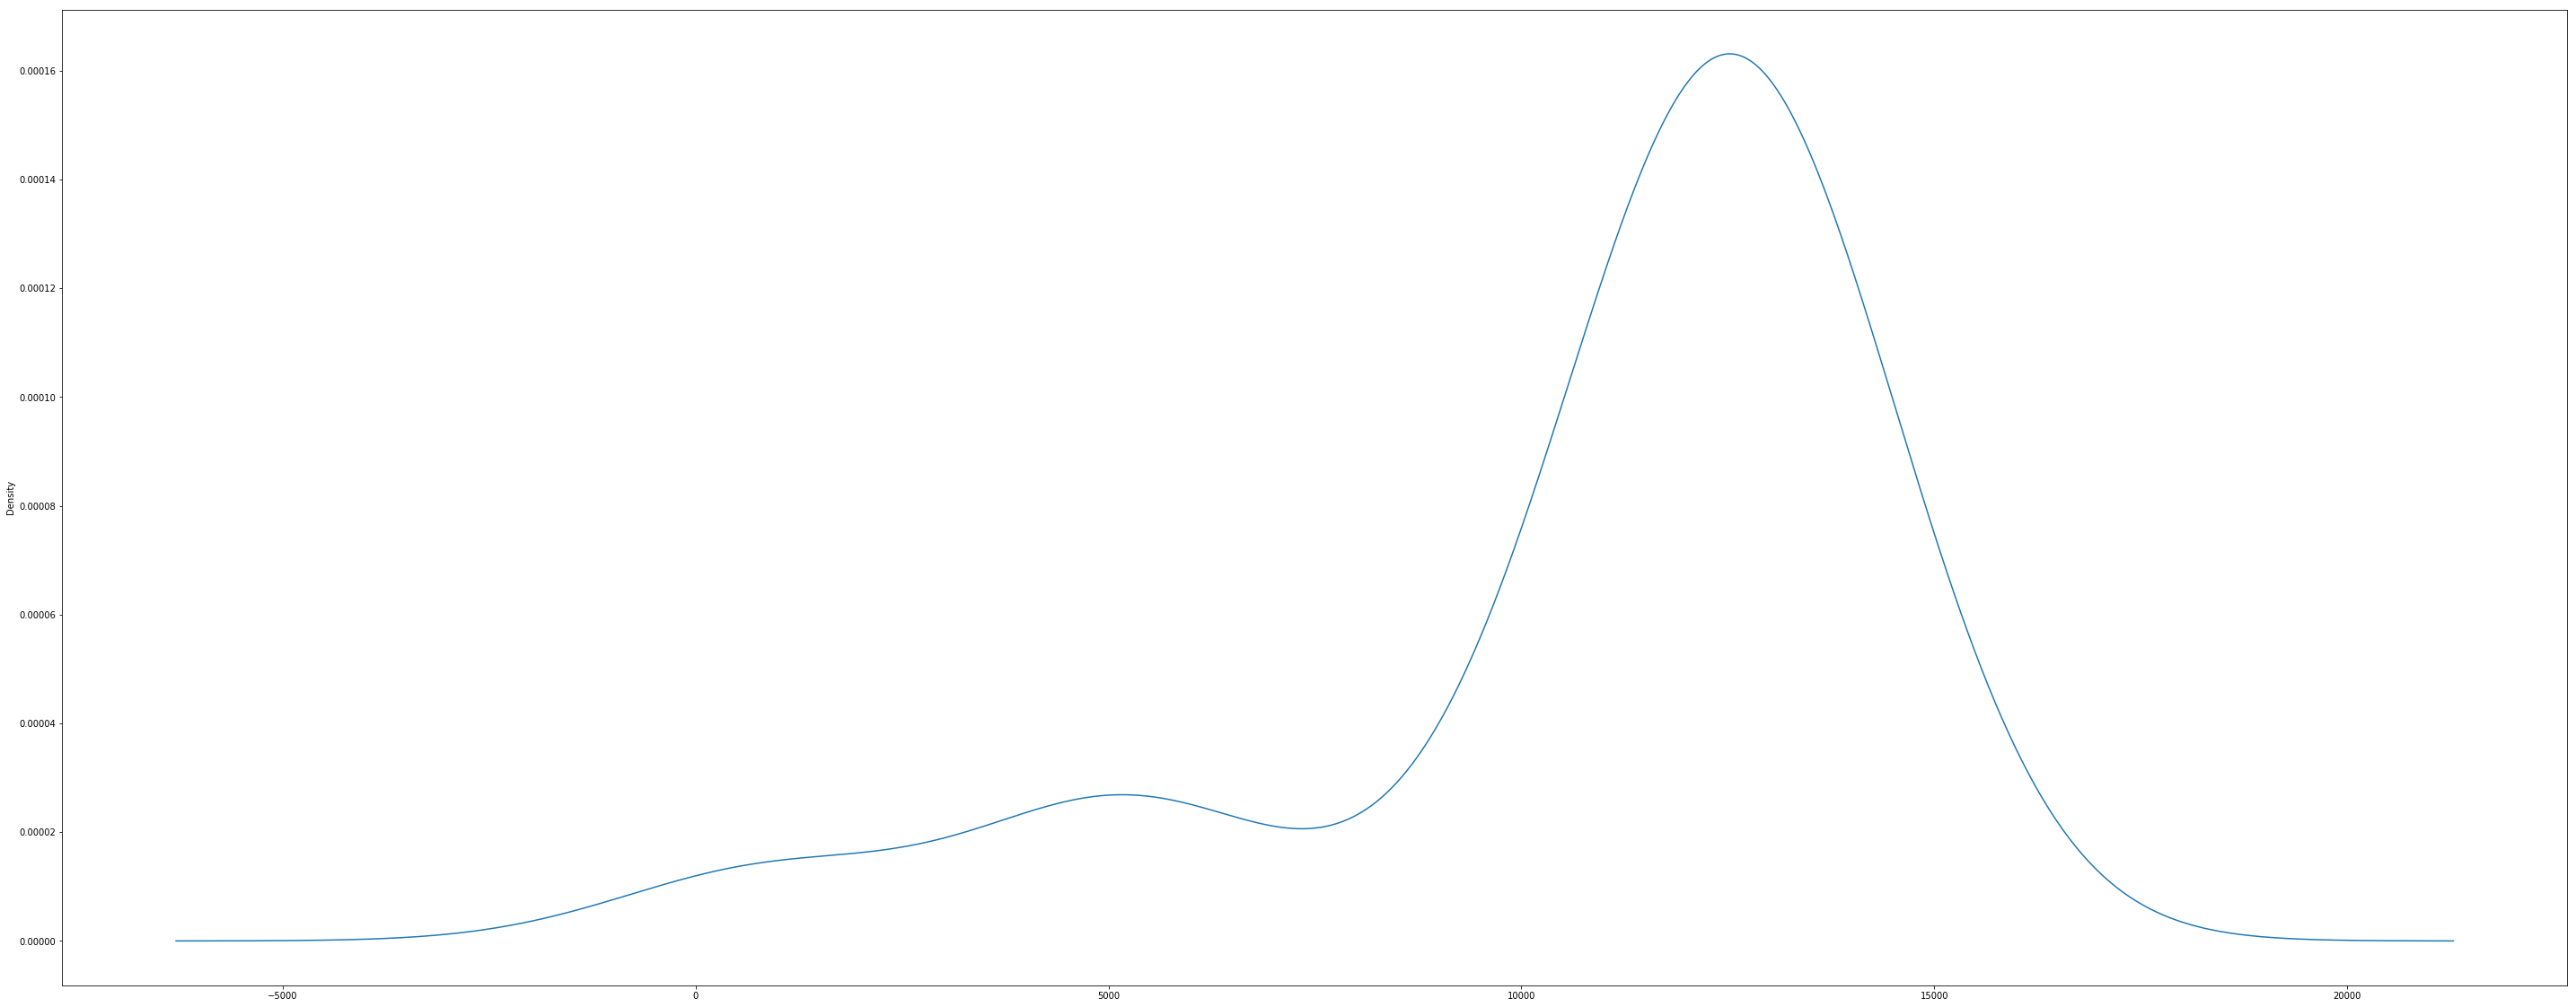

In [67]:
print(date_day_dis.plot(kind="kde", figsize=(50, 20)))

In [68]:
#Access the index of the pandas series created with value.counts

date_day_index = date_day_dis.index
print(type(date_day_index))

print(date_day_index[0:5])

date_day_index  = pd.to_datetime(date_day_index)
print(type(date_day_index))

<class 'pandas.core.indexes.base.Index'>
Index(['2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08', '2016-03-09'], dtype='object')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Text(0.5, 1.0, 'Barplot')

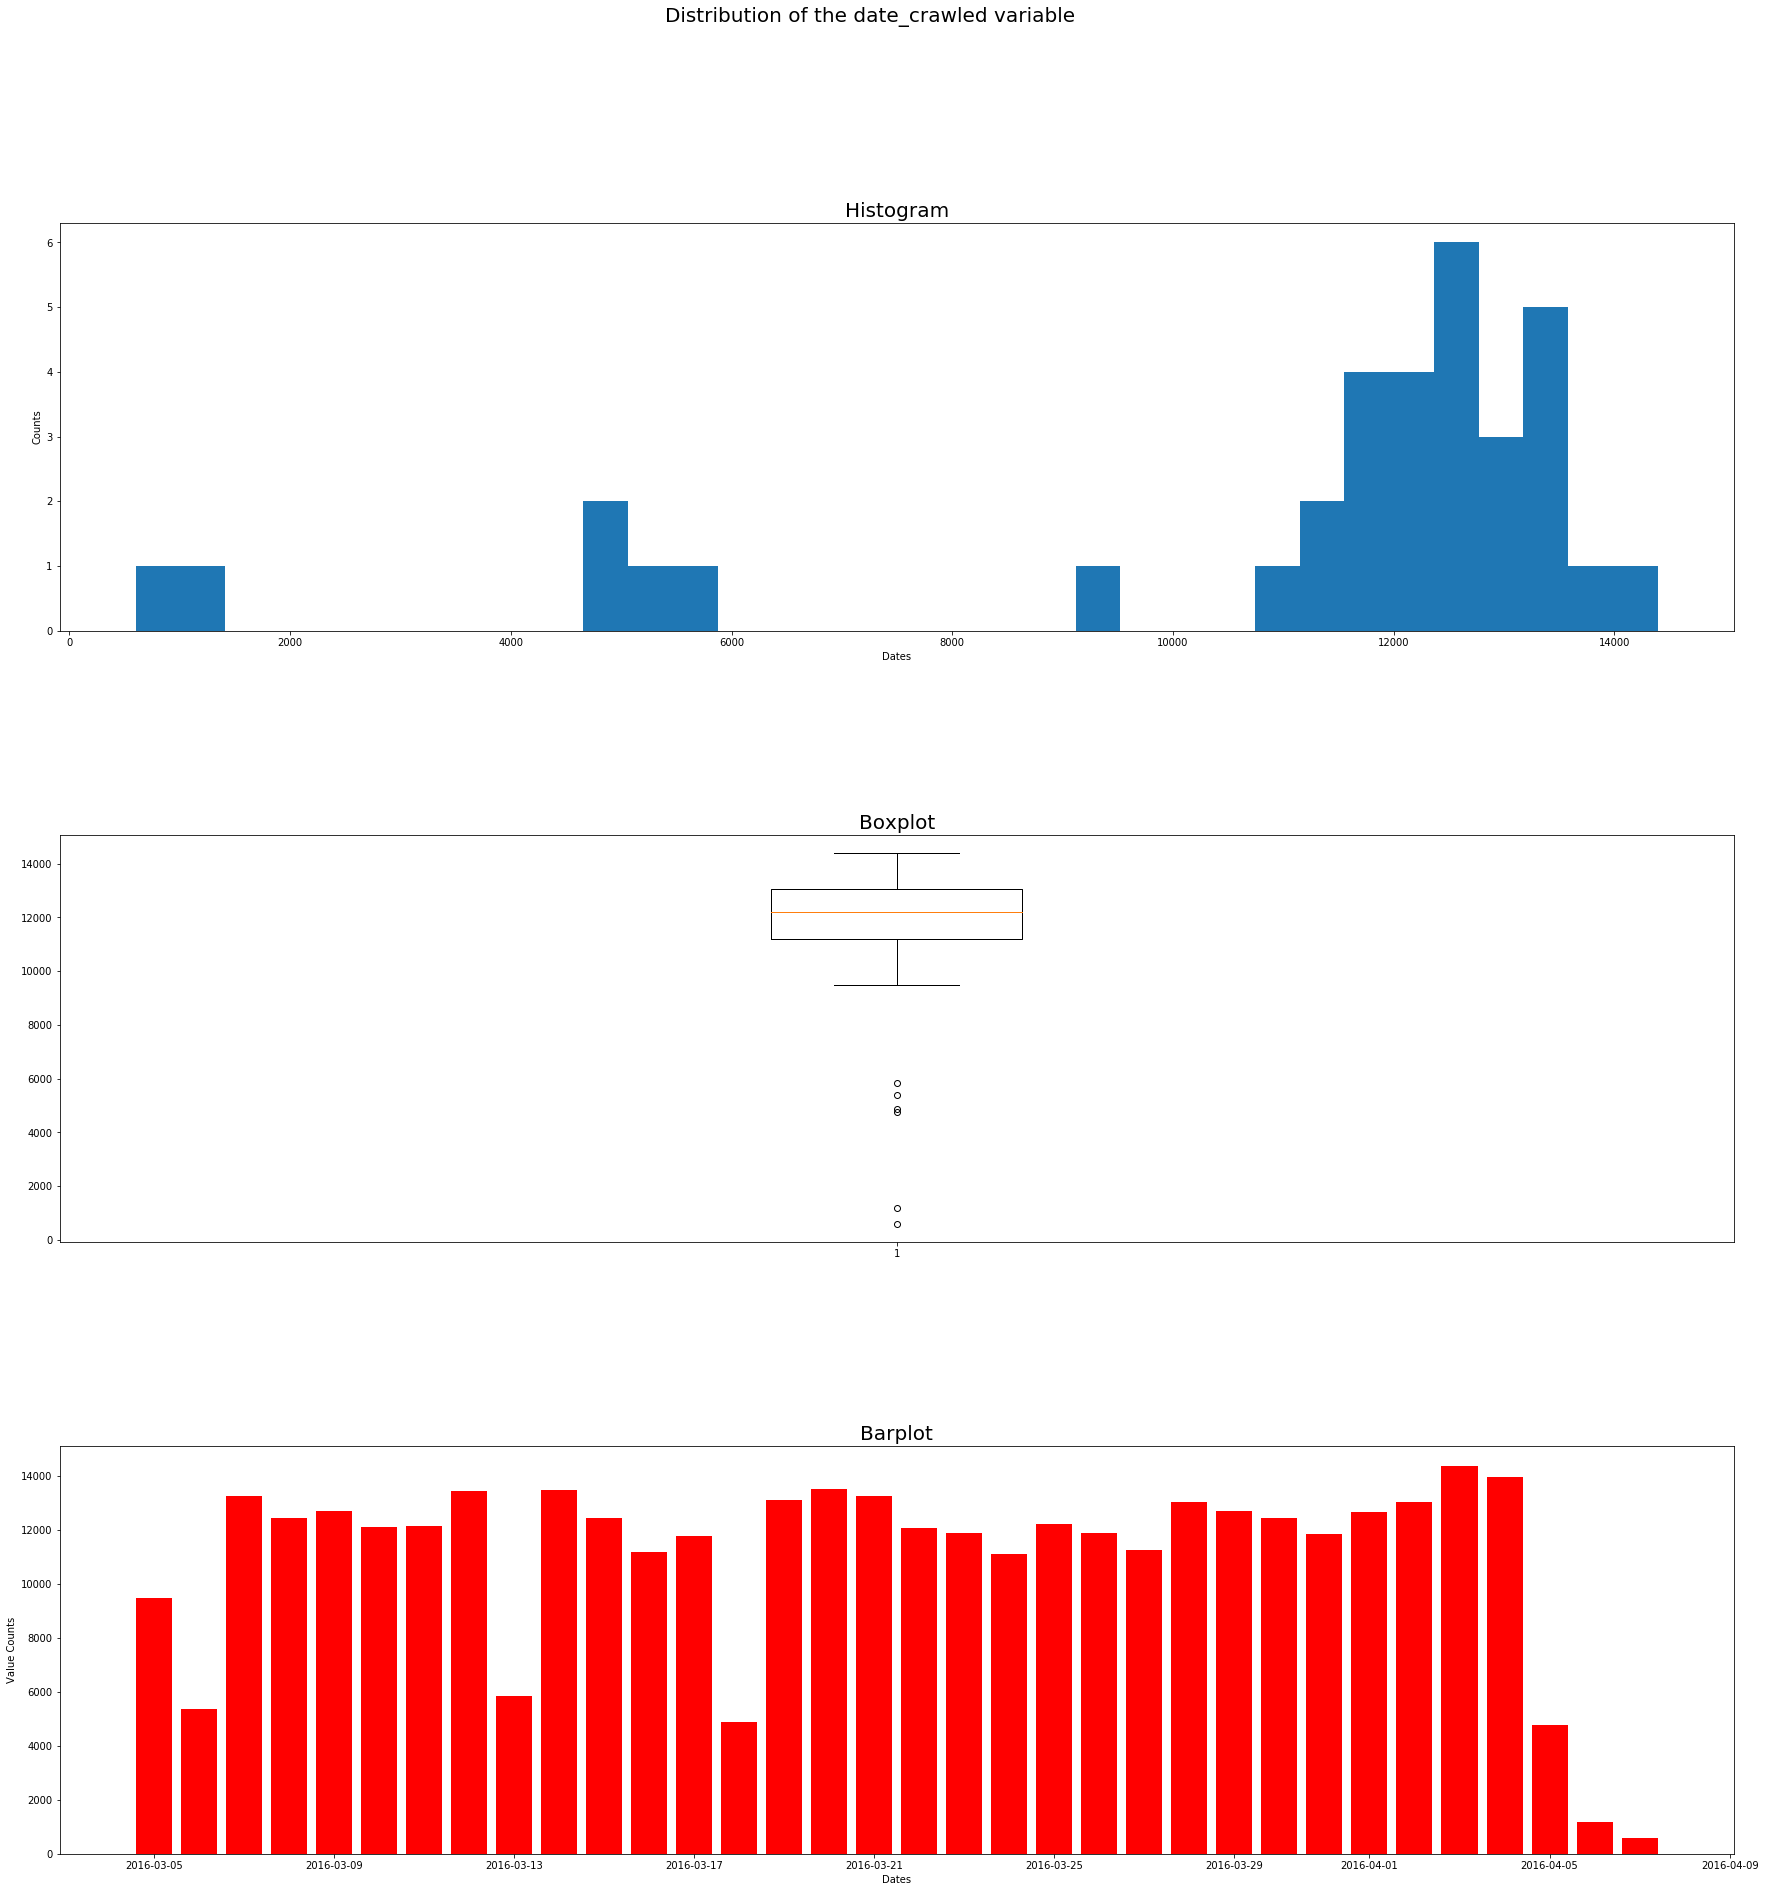

In [69]:
fig=plt.figure(figsize=(30,30))
fig.suptitle('Distribution of the date_crawled variable', fontsize=20)
plt.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.hist(x=date_day_dis, bins=34)
ax2.boxplot(x=date_day_dis )
ax3.bar(date_day_index, date_day_dis, color="red")

# Axes.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)
#ax1.set_xticklabels(labels=date_day_index, rotation='vertical',
#                    fontdict ={'fontsize': 12})
#ax3.set_xticklabels(labels=date_day_index, 
#                    rotation='vertical', rotation_mode="anchor")
# Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)
ax1.set_xlabel(xlabel="Dates")
ax1.set_ylabel(ylabel="Counts")
ax3.set_xlabel(xlabel="Dates")
ax3.set_ylabel(ylabel="Value Counts")

# ax1.title.set_text('First Plot')
ax1.set_title('Histogram', fontdict ={'fontsize': 20})
ax2.set_title('Boxplot', fontdict ={'fontsize': 20})
ax3.set_title('Barplot', fontdict ={'fontsize': 20})



### Creation of plots by making a function 

In [70]:
# Creation of plots by making a function 

def create_plots(title, index, series):
    
    fig=plt.figure(figsize=(30,30))
    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(hspace = 0.5)
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)

    ax1.hist(x=series, bins=34, color="gold")
    ax2.boxplot(x=series)
    ax3.bar(index, series, color="green")

    # Axes.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)
    ax1.set_xticklabels(labels=index, rotation='vertical',
                    fontdict ={'fontsize': 12})
    ax3.set_xticklabels(labels=index, 
                    rotation='vertical', rotation_mode="anchor")
    # Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)
    ax1.set_xlabel(xlabel="Dates")
    ax1.set_ylabel(ylabel="Counts")
    ax3.set_xlabel(xlabel="Dates")
    ax3.set_ylabel(ylabel="Value Counts")

    # ax1.title.set_text('First Plot')
    ax1.set_title('Histogram', fontdict ={'fontsize': 20})
    ax2.set_title('Boxplot', fontdict ={'fontsize': 20})
    ax3.set_title('Barplot', fontdict ={'fontsize': 20})
    
    

In [71]:
# Calculate statistics
print(calc_stats(date_day_dis))

{'Average': 10927.29411764706, 'Maximum': 14391, 'Minimum': 602, 'Median': 12197.5, 'Standard Deviation': 3593.46918163469}


In [72]:
# Explore date_crawled
date_day_ad =(auto_date["ad_created"].str[:10])
print(date_day_ad.iloc[1:10,])


1    2016-03-24
2    2016-03-14
3    2016-03-17
4    2016-03-31
5    2016-04-04
6    2016-04-01
7    2016-03-21
8    2016-04-04
9    2016-03-17
Name: ad_created, dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


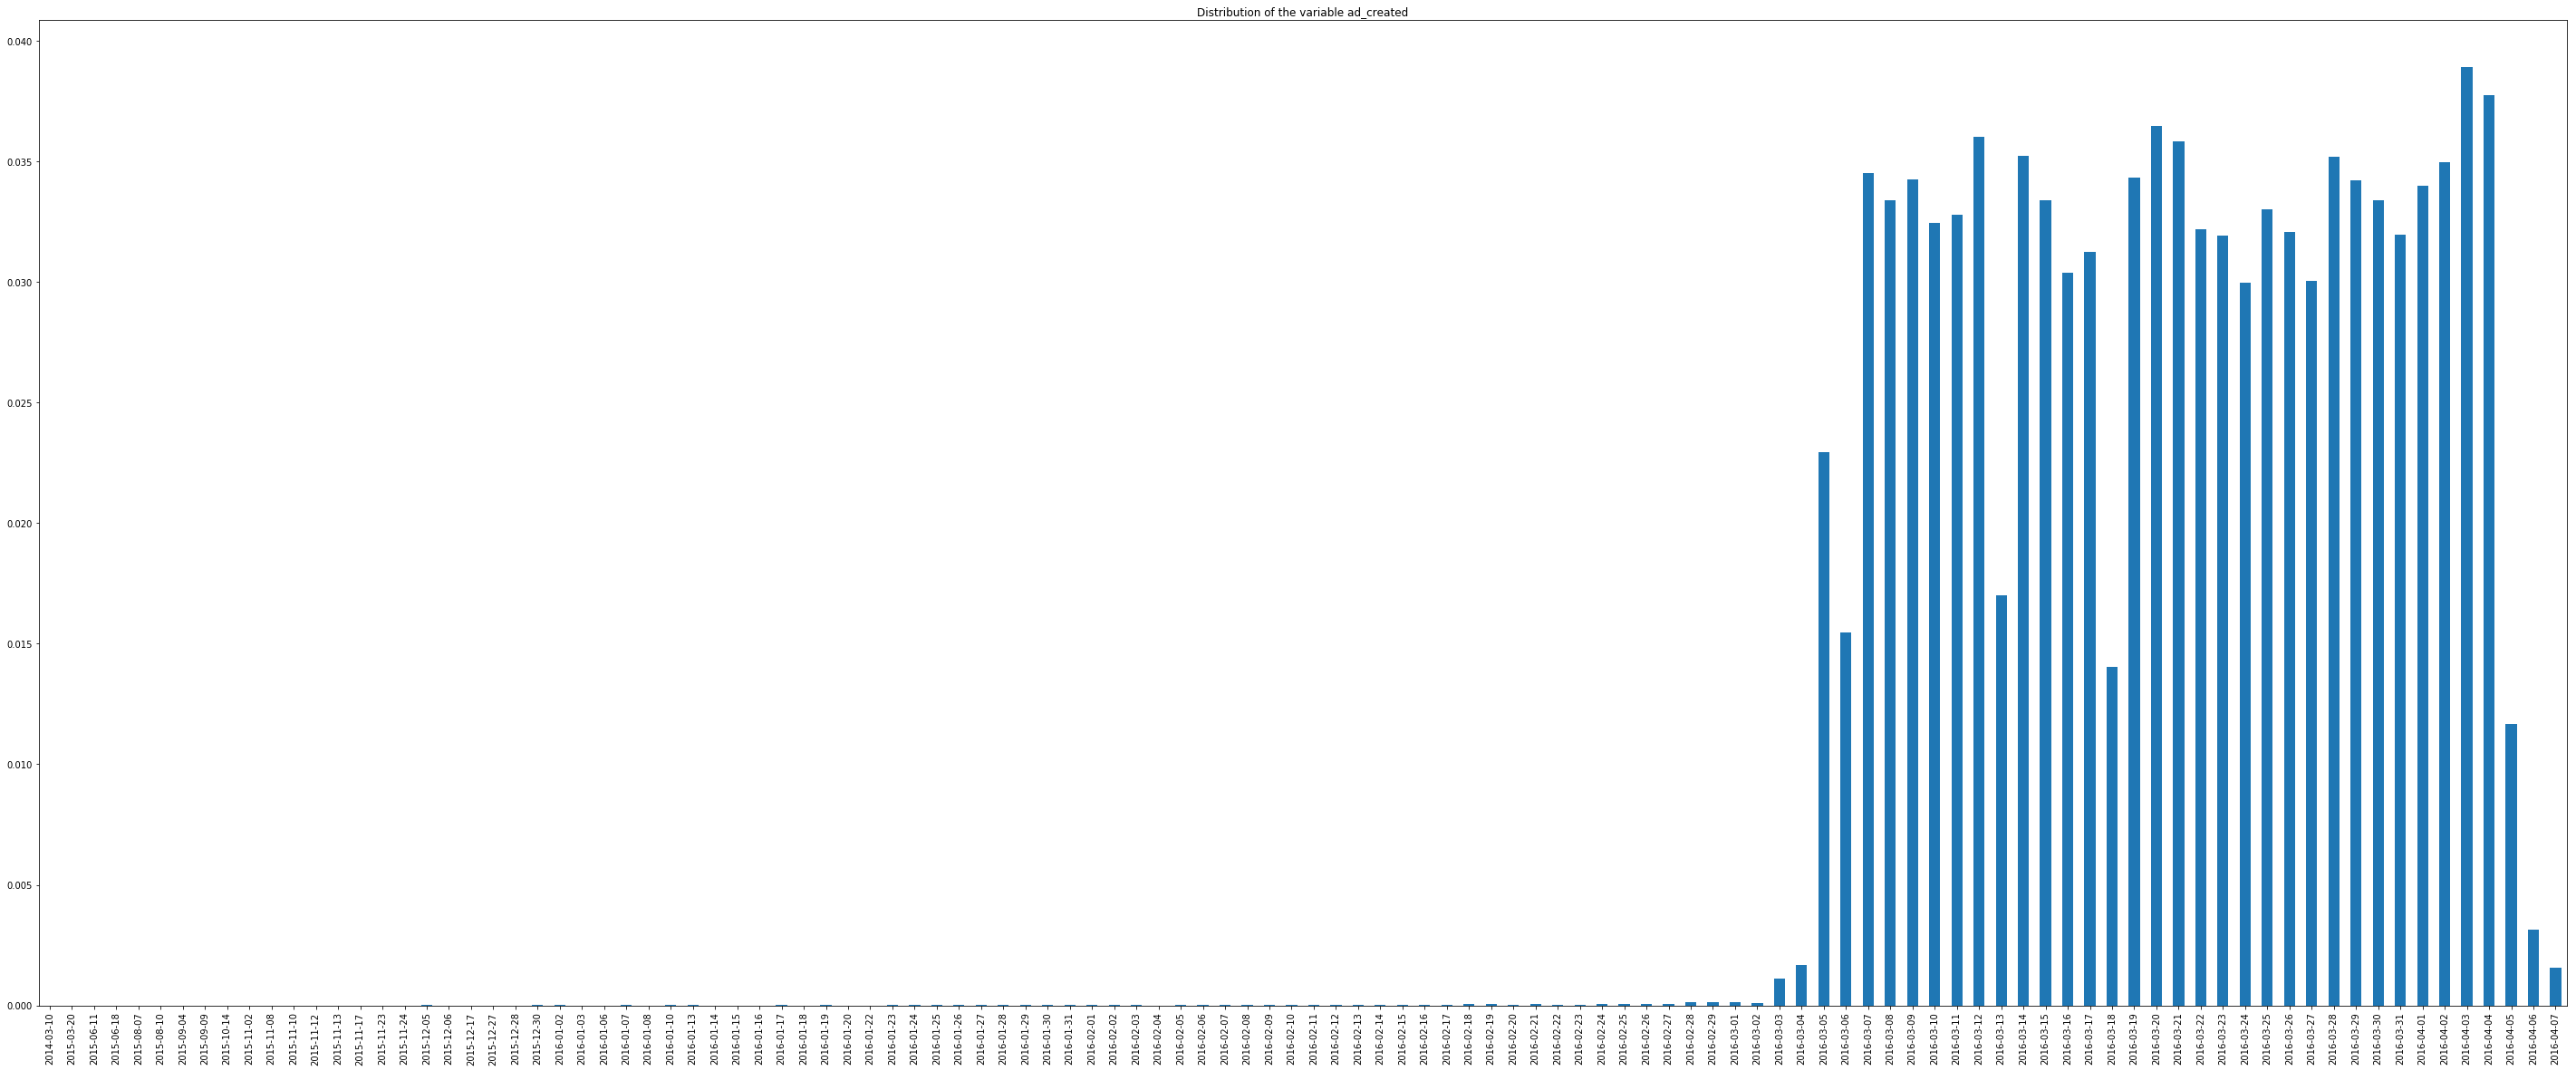

In [73]:


date_day_ad_dis = (date_day_ad.value_counts(normalize=True, dropna=False).
                   sort_index(inplace=False))

date_day_ad_dis.iloc[0:5, ]

print(date_day_ad_dis.plot(kind="bar", 
                           title="Distribution of the variable ad_created",
                           figsize=(50, 20)))

# There are outliers to the left
# The distribution is skewed to the left
# Data transformation can reduce skewness

AxesSubplot(0.125,0.125;0.775x0.755)


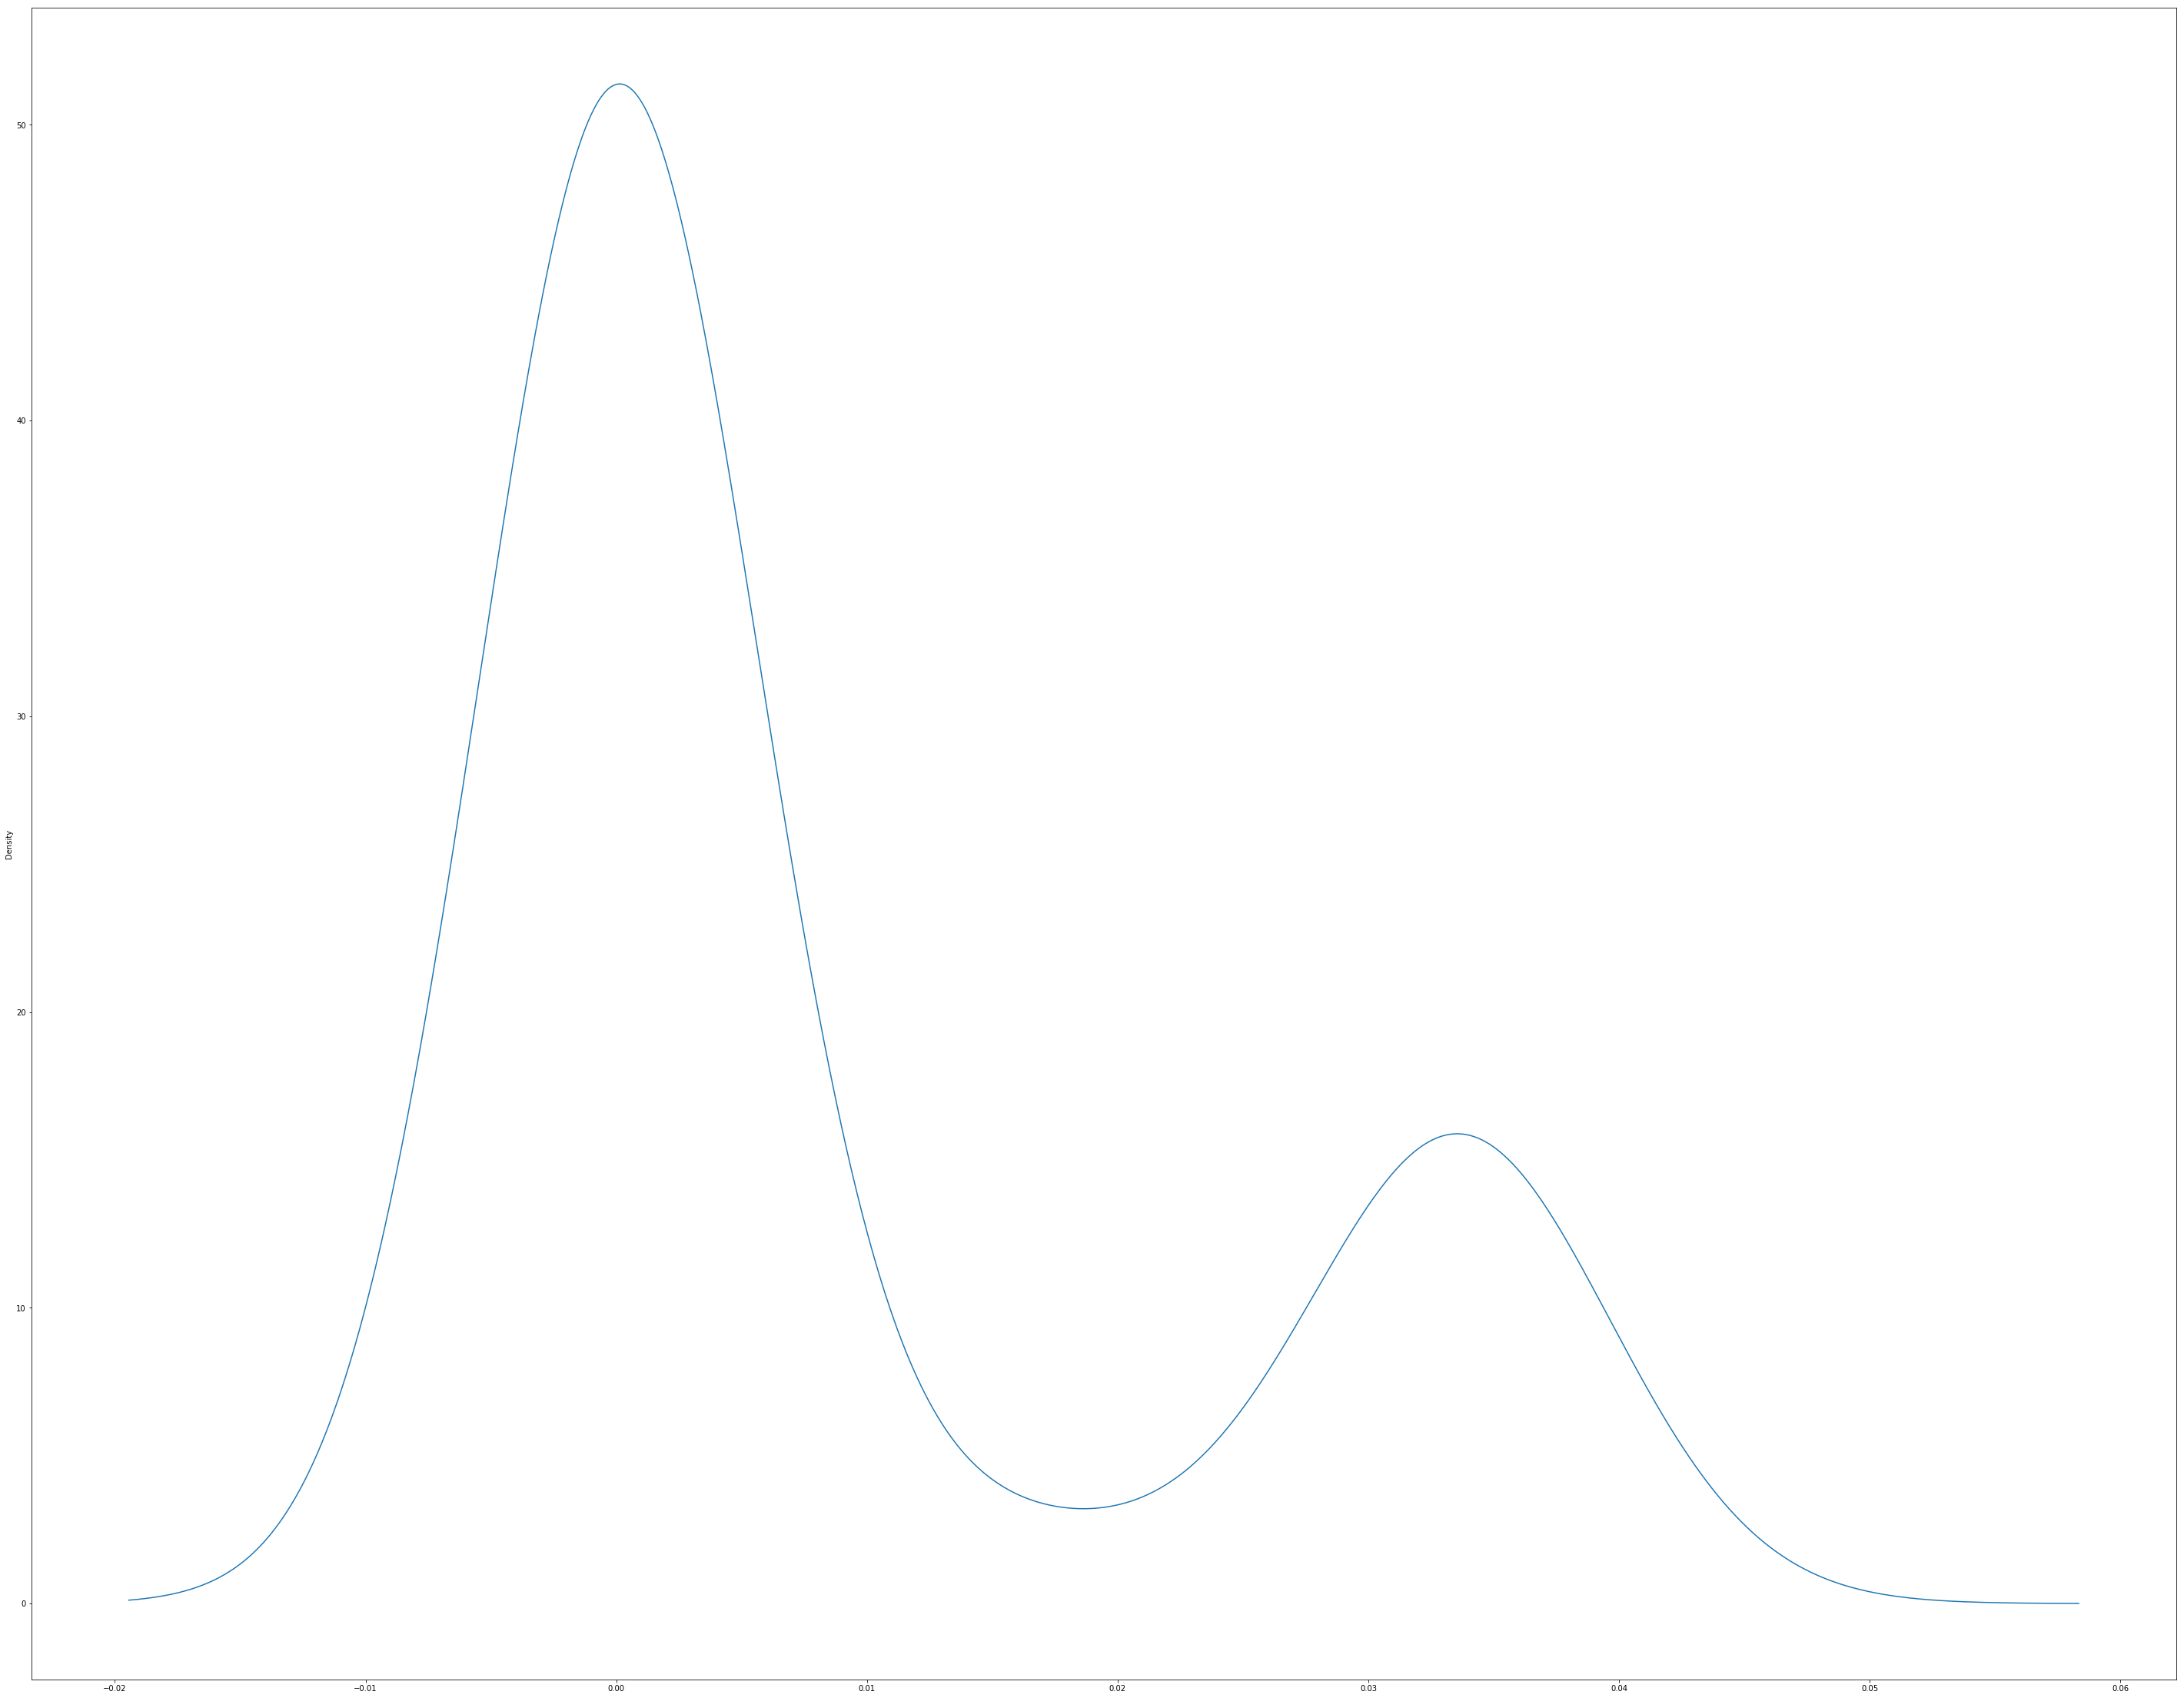

In [74]:
print(date_day_ad_dis.plot(kind="kde",figsize=(50, 40)))


In [75]:
# Calculate statistics
print(calc_stats(date_day_ad_dis))

{'Average': 0.008771929824561401, 'Maximum': 0.038893434680562437, 'Minimum': 2.6915871751254282e-06, 'Median': 2.018690381344071e-05, 'Standard Deviation': 0.014393077773172355}


In [76]:
print(iqr_outliers(date_day_ad_dis))

{'Quantile - 25%': 5.383174350250856e-06, 'Quantile - 75%': 0.016624588187162205, 'Median - 50%': 2.018690381344071e-05, 'iqr': 0.016619205012811954, 'outliers_lower_bound': -0.02492342434486768, 'outliers_upper_bound': 0.041553395706380135}


In [77]:
# Calculate IQR
print(iqr_outliers(date_day_ad_dis))

{'Quantile - 25%': 5.383174350250856e-06, 'Quantile - 75%': 0.016624588187162205, 'Median - 50%': 2.018690381344071e-05, 'iqr': 0.016619205012811954, 'outliers_lower_bound': -0.02492342434486768, 'outliers_upper_bound': 0.041553395706380135}


In [78]:
#Access the index of the pandas series created with value.counts

date_day_dis_index = date_day_ad_dis.index
print(type(date_day_dis_index))

print(date_day_dis_index[0:5])

date_day_dis_index  = pd.to_datetime(date_day_dis_index)
print(type(date_day_dis_index))

<class 'pandas.core.indexes.base.Index'>
Index(['2014-03-10', '2015-03-20', '2015-06-11', '2015-06-18', '2015-08-07'], dtype='object')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


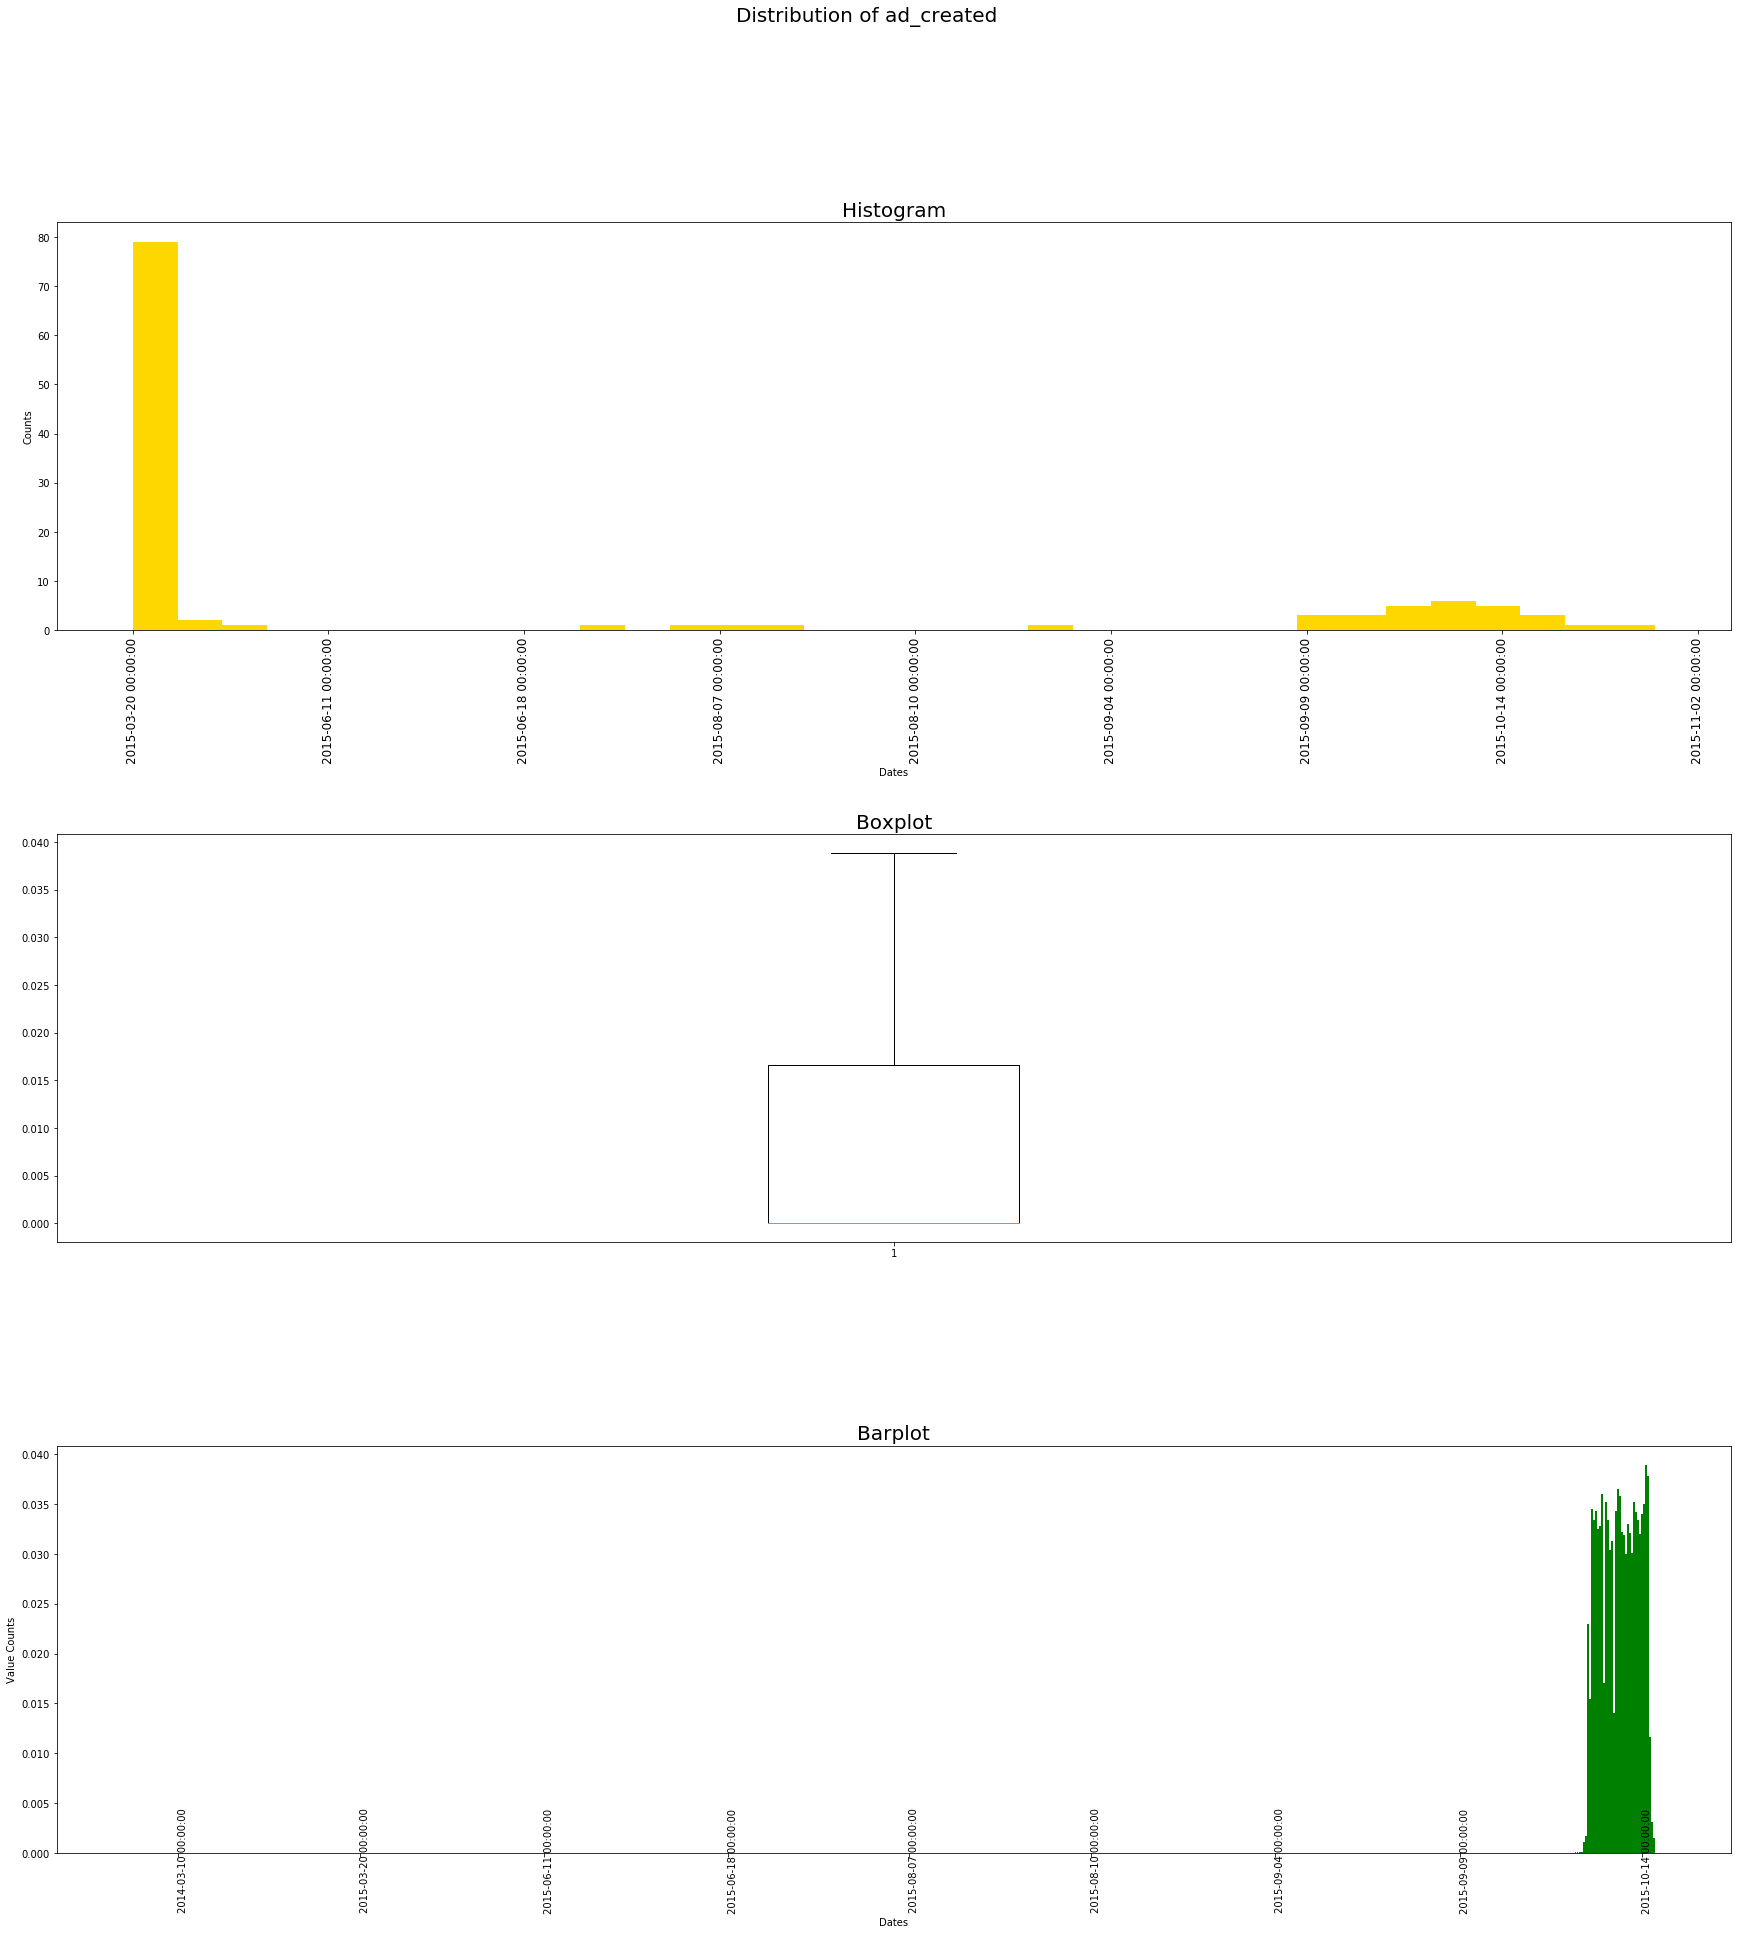

In [79]:
# 'Distribution of ad_created'
# date_day_ad_dis 
# date_day_dis_index

create_plots('Distribution of ad_created', date_day_dis_index, date_day_ad_dis )

#### Explore last seen

In [80]:

date_day_last_seen_5555 =(auto_date["last_seen"].str[:10])
print(date_day_last_seen_5555.iloc[1:10,])


1    2016-04-07
2    2016-04-05
3    2016-03-17
4    2016-04-06
5    2016-04-06
6    2016-04-05
7    2016-03-25
8    2016-04-04
9    2016-03-31
Name: last_seen, dtype: object


2016-03-05    0.001292
2016-03-06    0.004134
2016-03-07    0.005262
2016-03-08    0.008056
2016-03-09    0.009994
Name: last_seen, dtype: float64


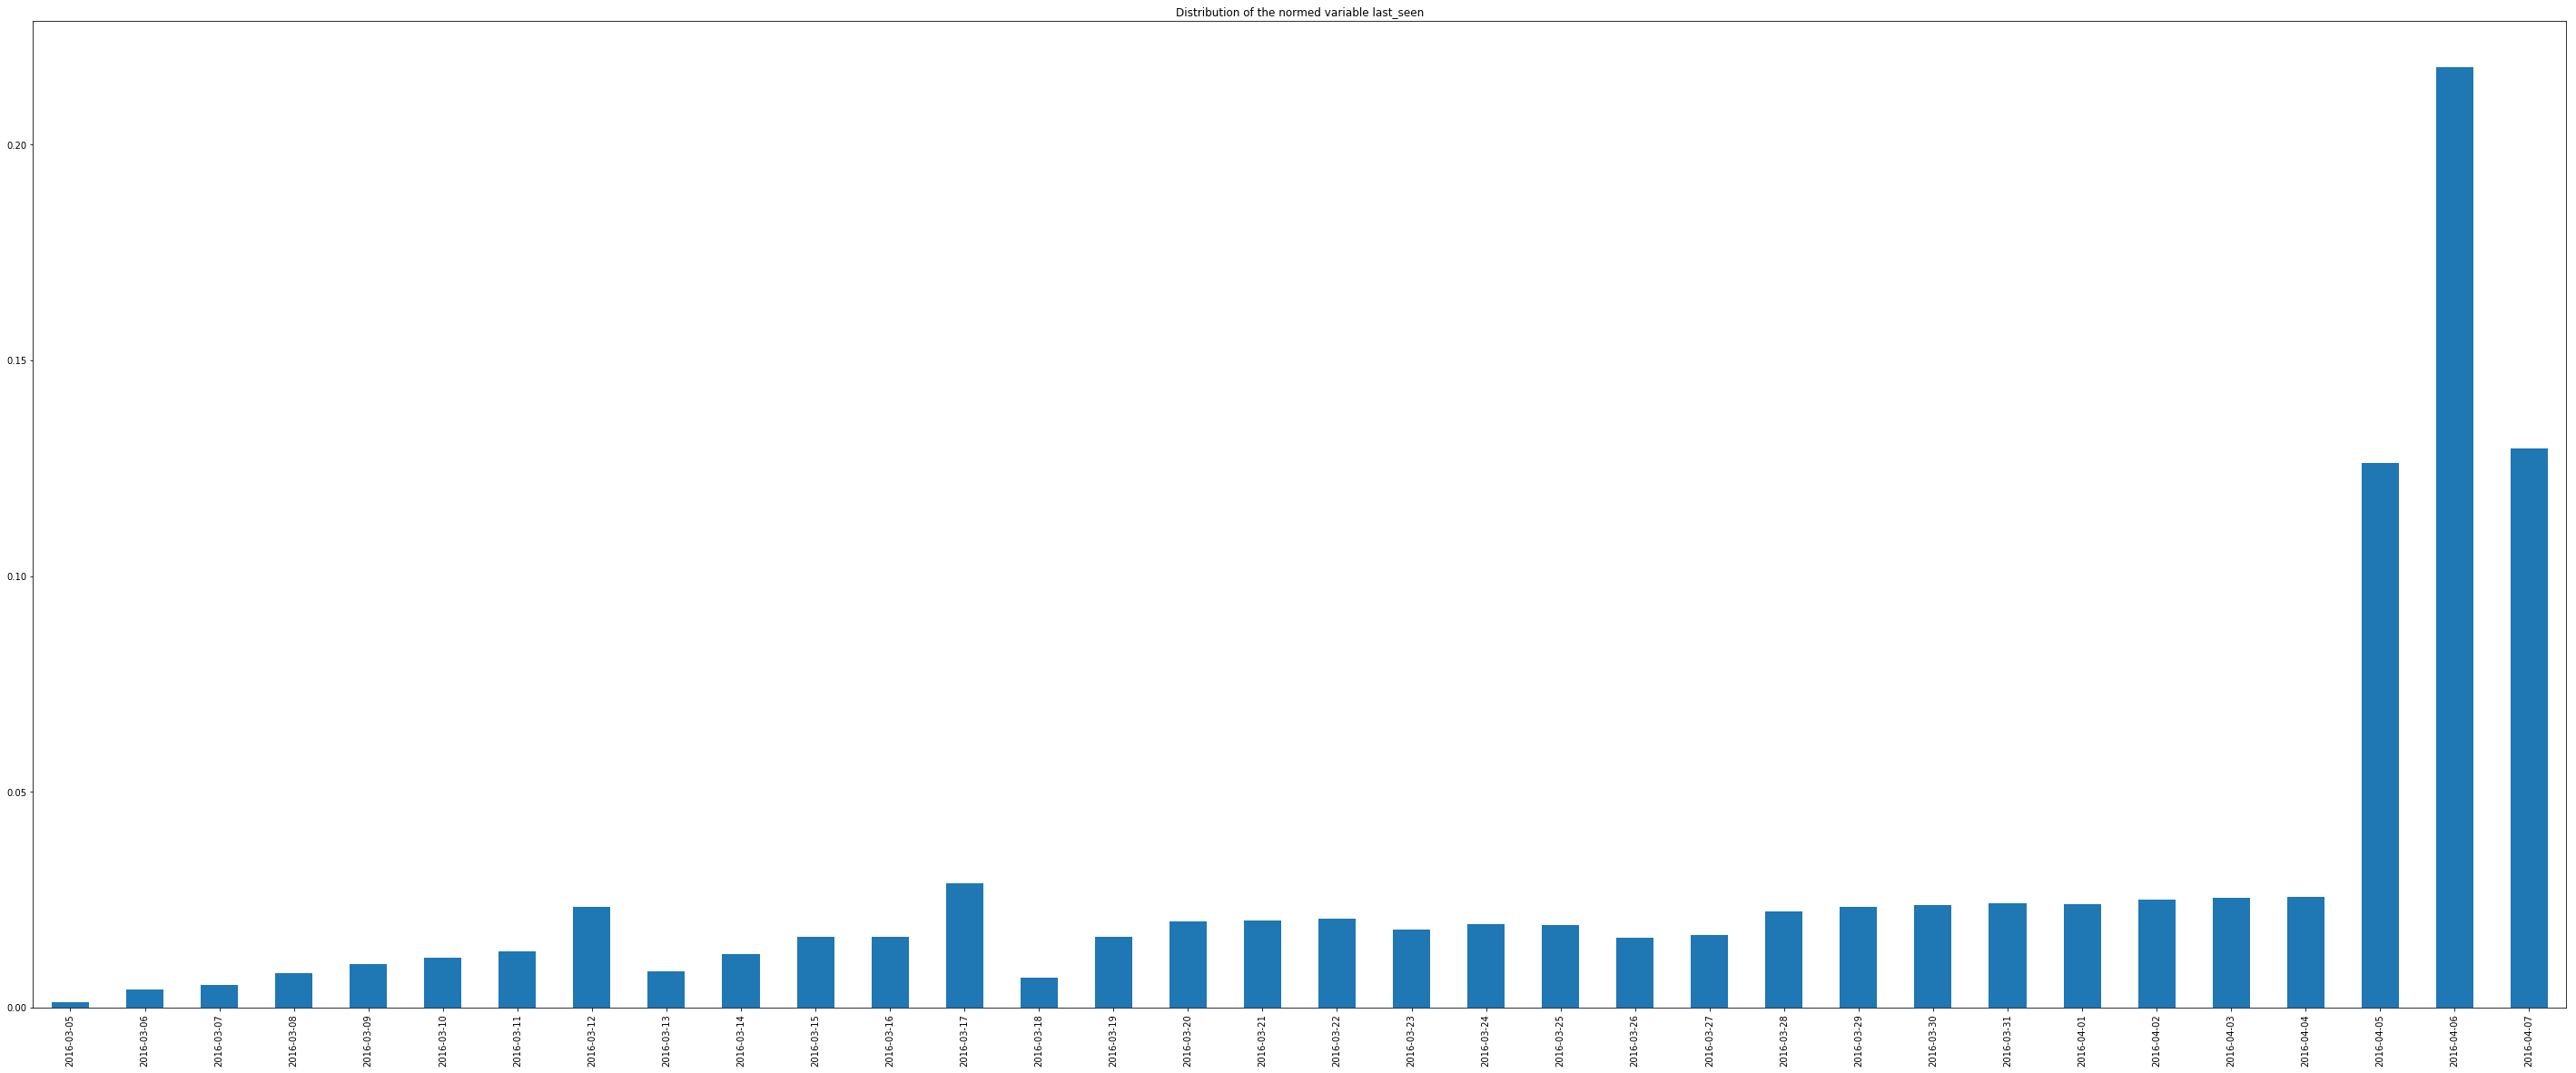

In [81]:
# Count occurence of values making a distribution of value
last_dis_norm_5555 = (date_day_last_seen_5555.value_counts(normalize=True, dropna=False).
                      sort_index(inplace=False))
print(last_dis_norm_5555.iloc[0:5, ])

last_dis_norm_5555.plot(kind="bar", title="Distribution of the normed variable last_seen",
                        figsize=(50, 20))


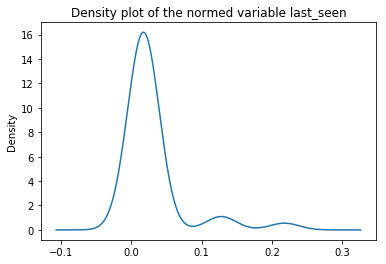

In [82]:
last_dis_norm_5555.plot(kind="kde", title="Density plot of the normed variable last_seen")

2016-03-05     480
2016-03-06    1536
2016-03-07    1955
2016-03-08    2993
2016-03-09    3713
Name: last_seen, dtype: int64


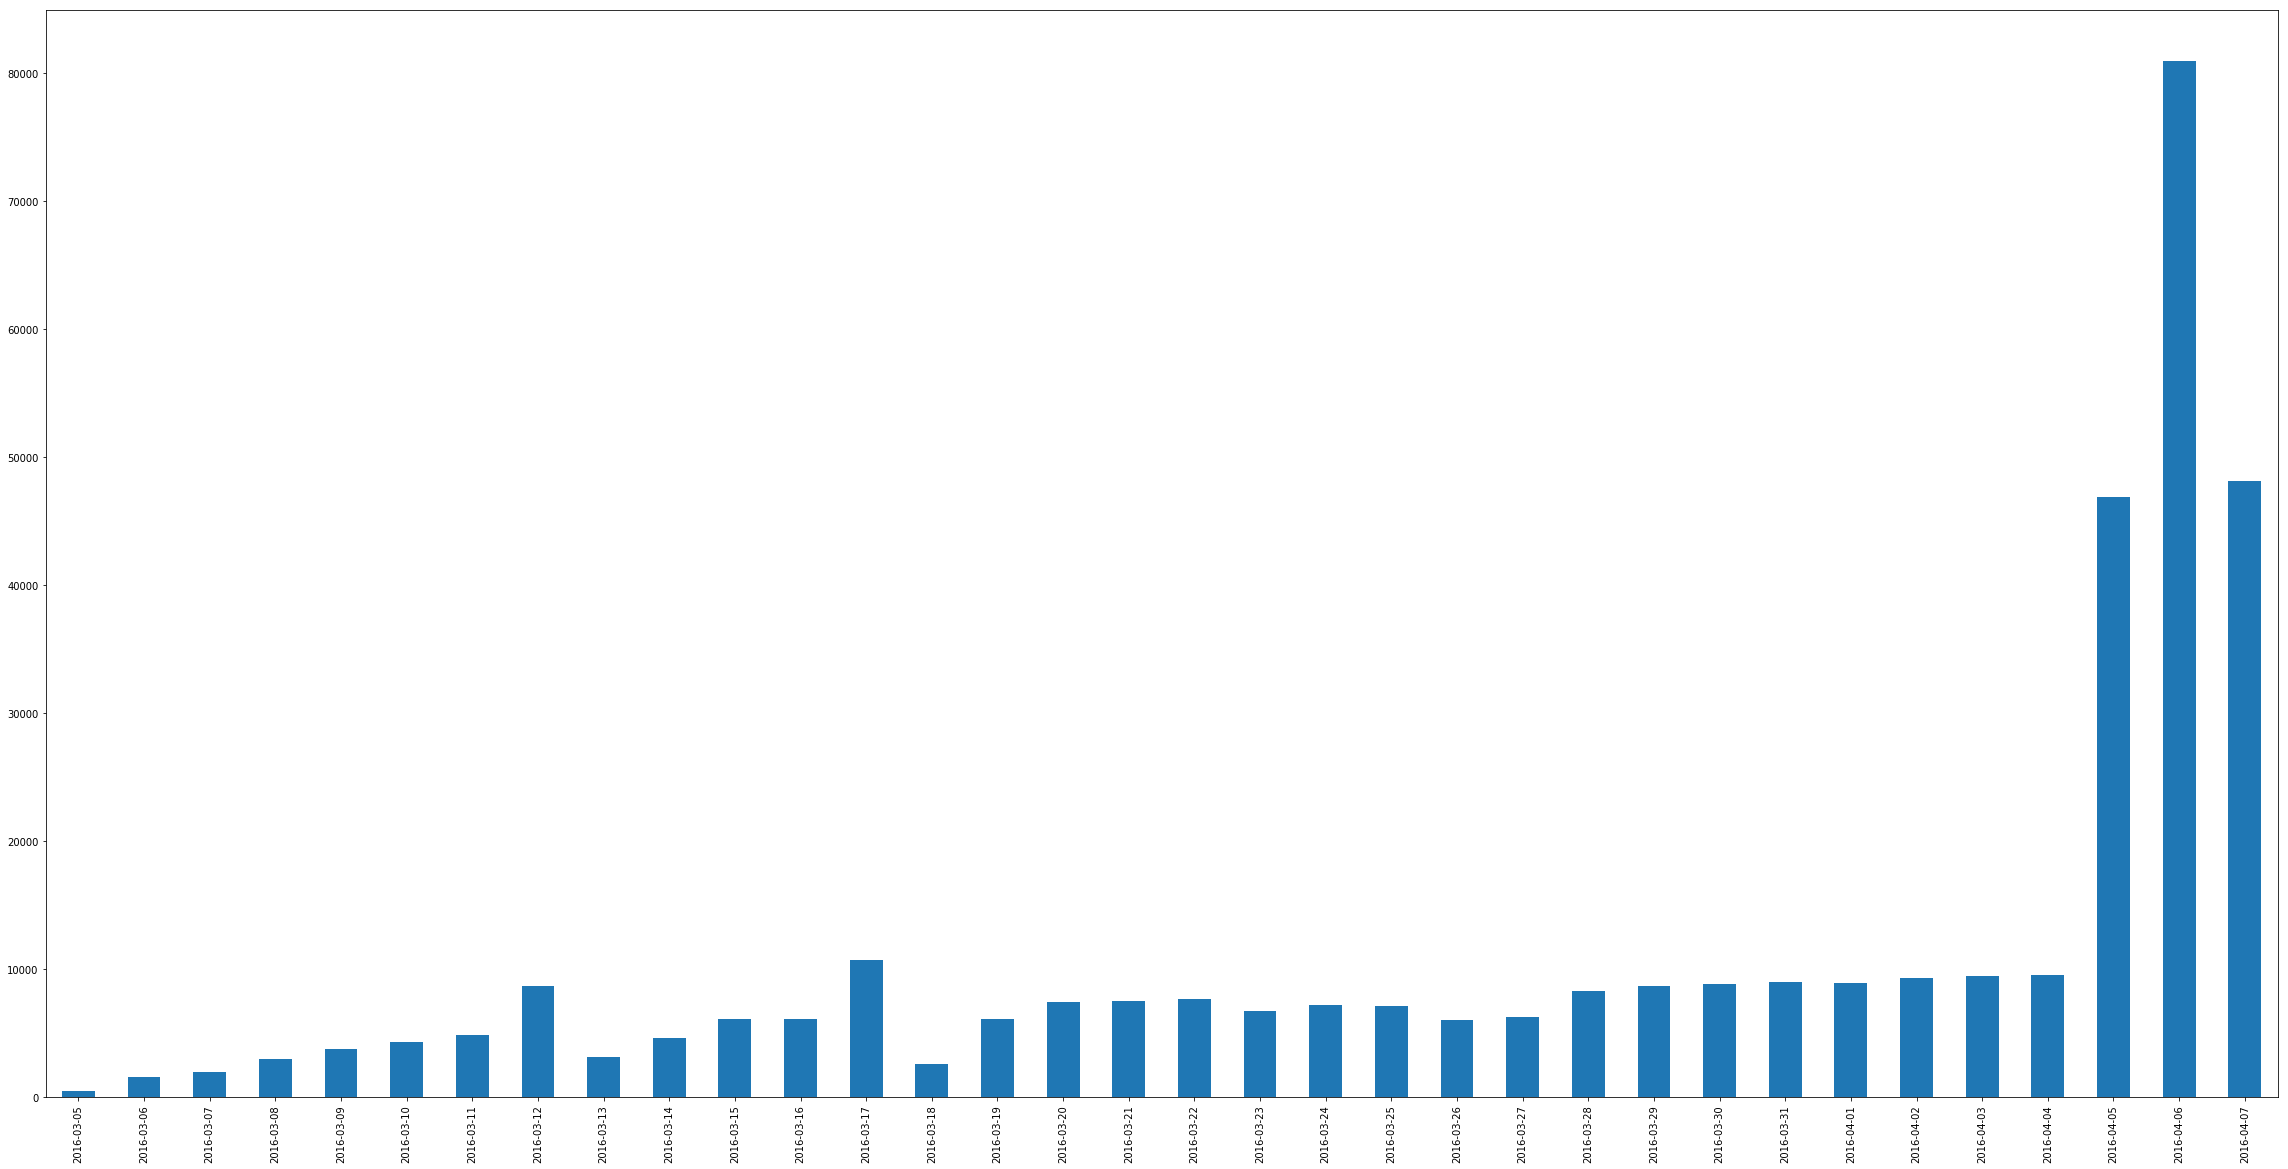

In [83]:

# Compare norm with not norm
last_dis_5555 = (date_day_last_seen_5555.value_counts().
                      sort_index(inplace=False))
print(last_dis_5555 .iloc[0:5, ])

last_dis_5555.plot(kind="bar", figsize=(40, 20))

In [84]:
# Calculate statistics
print(calc_stats(last_dis_norm_5555))
print(calc_stats(last_dis_5555))


{'Average': 0.029411764705882353, 'Maximum': 0.21783015008290088, 'Minimum': 0.0012919618440602055, 'Median': 0.019166792274068173, 'Standard Deviation': 0.04309236944169074}
{'Average': 10927.29411764706, 'Maximum': 80930, 'Minimum': 480, 'Median': 7121.0, 'Standard Deviation': 16010.021833932477}


In [85]:
print(iqr_outliers(last_dis_norm_5555))
print(iqr_outliers(last_dis_5555))

{'Quantile - 25%': 0.012486945802200642, 'Quantile - 75%': 0.02398069593678, 'Median - 50%': 0.019166792274068173, 'iqr': 0.011493750134579359, 'outliers_lower_bound': -0.004753679399668396, 'outliers_upper_bound': 0.04122132113864904}
{'Quantile - 25%': 4639.25, 'Quantile - 75%': 8909.5, 'Median - 50%': 7121.0, 'iqr': 4270.25, 'outliers_lower_bound': -1766.125, 'outliers_upper_bound': 15314.875}


In [86]:
#Access the index of the pandas series created with value.counts

last_dis_norm_5555_index = last_dis_norm_5555.index
print(type(last_dis_norm_5555_index))

print(last_dis_norm_5555_index[0:5])

last_dis_norm_5555_index = pd.to_datetime(last_dis_norm_5555_index)
print(type(last_dis_norm_5555_index))

#Access the index of the pandas series created with value.counts

last_dis_5555_index = last_dis_5555.index
print(type(last_dis_5555_index ))

print(last_dis_5555_index [0:5])

last_dis_5555_index  = pd.to_datetime(last_dis_5555_index )
print(type(last_dis_5555_index ))

<class 'pandas.core.indexes.base.Index'>
Index(['2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08', '2016-03-09'], dtype='object')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.base.Index'>
Index(['2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08', '2016-03-09'], dtype='object')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


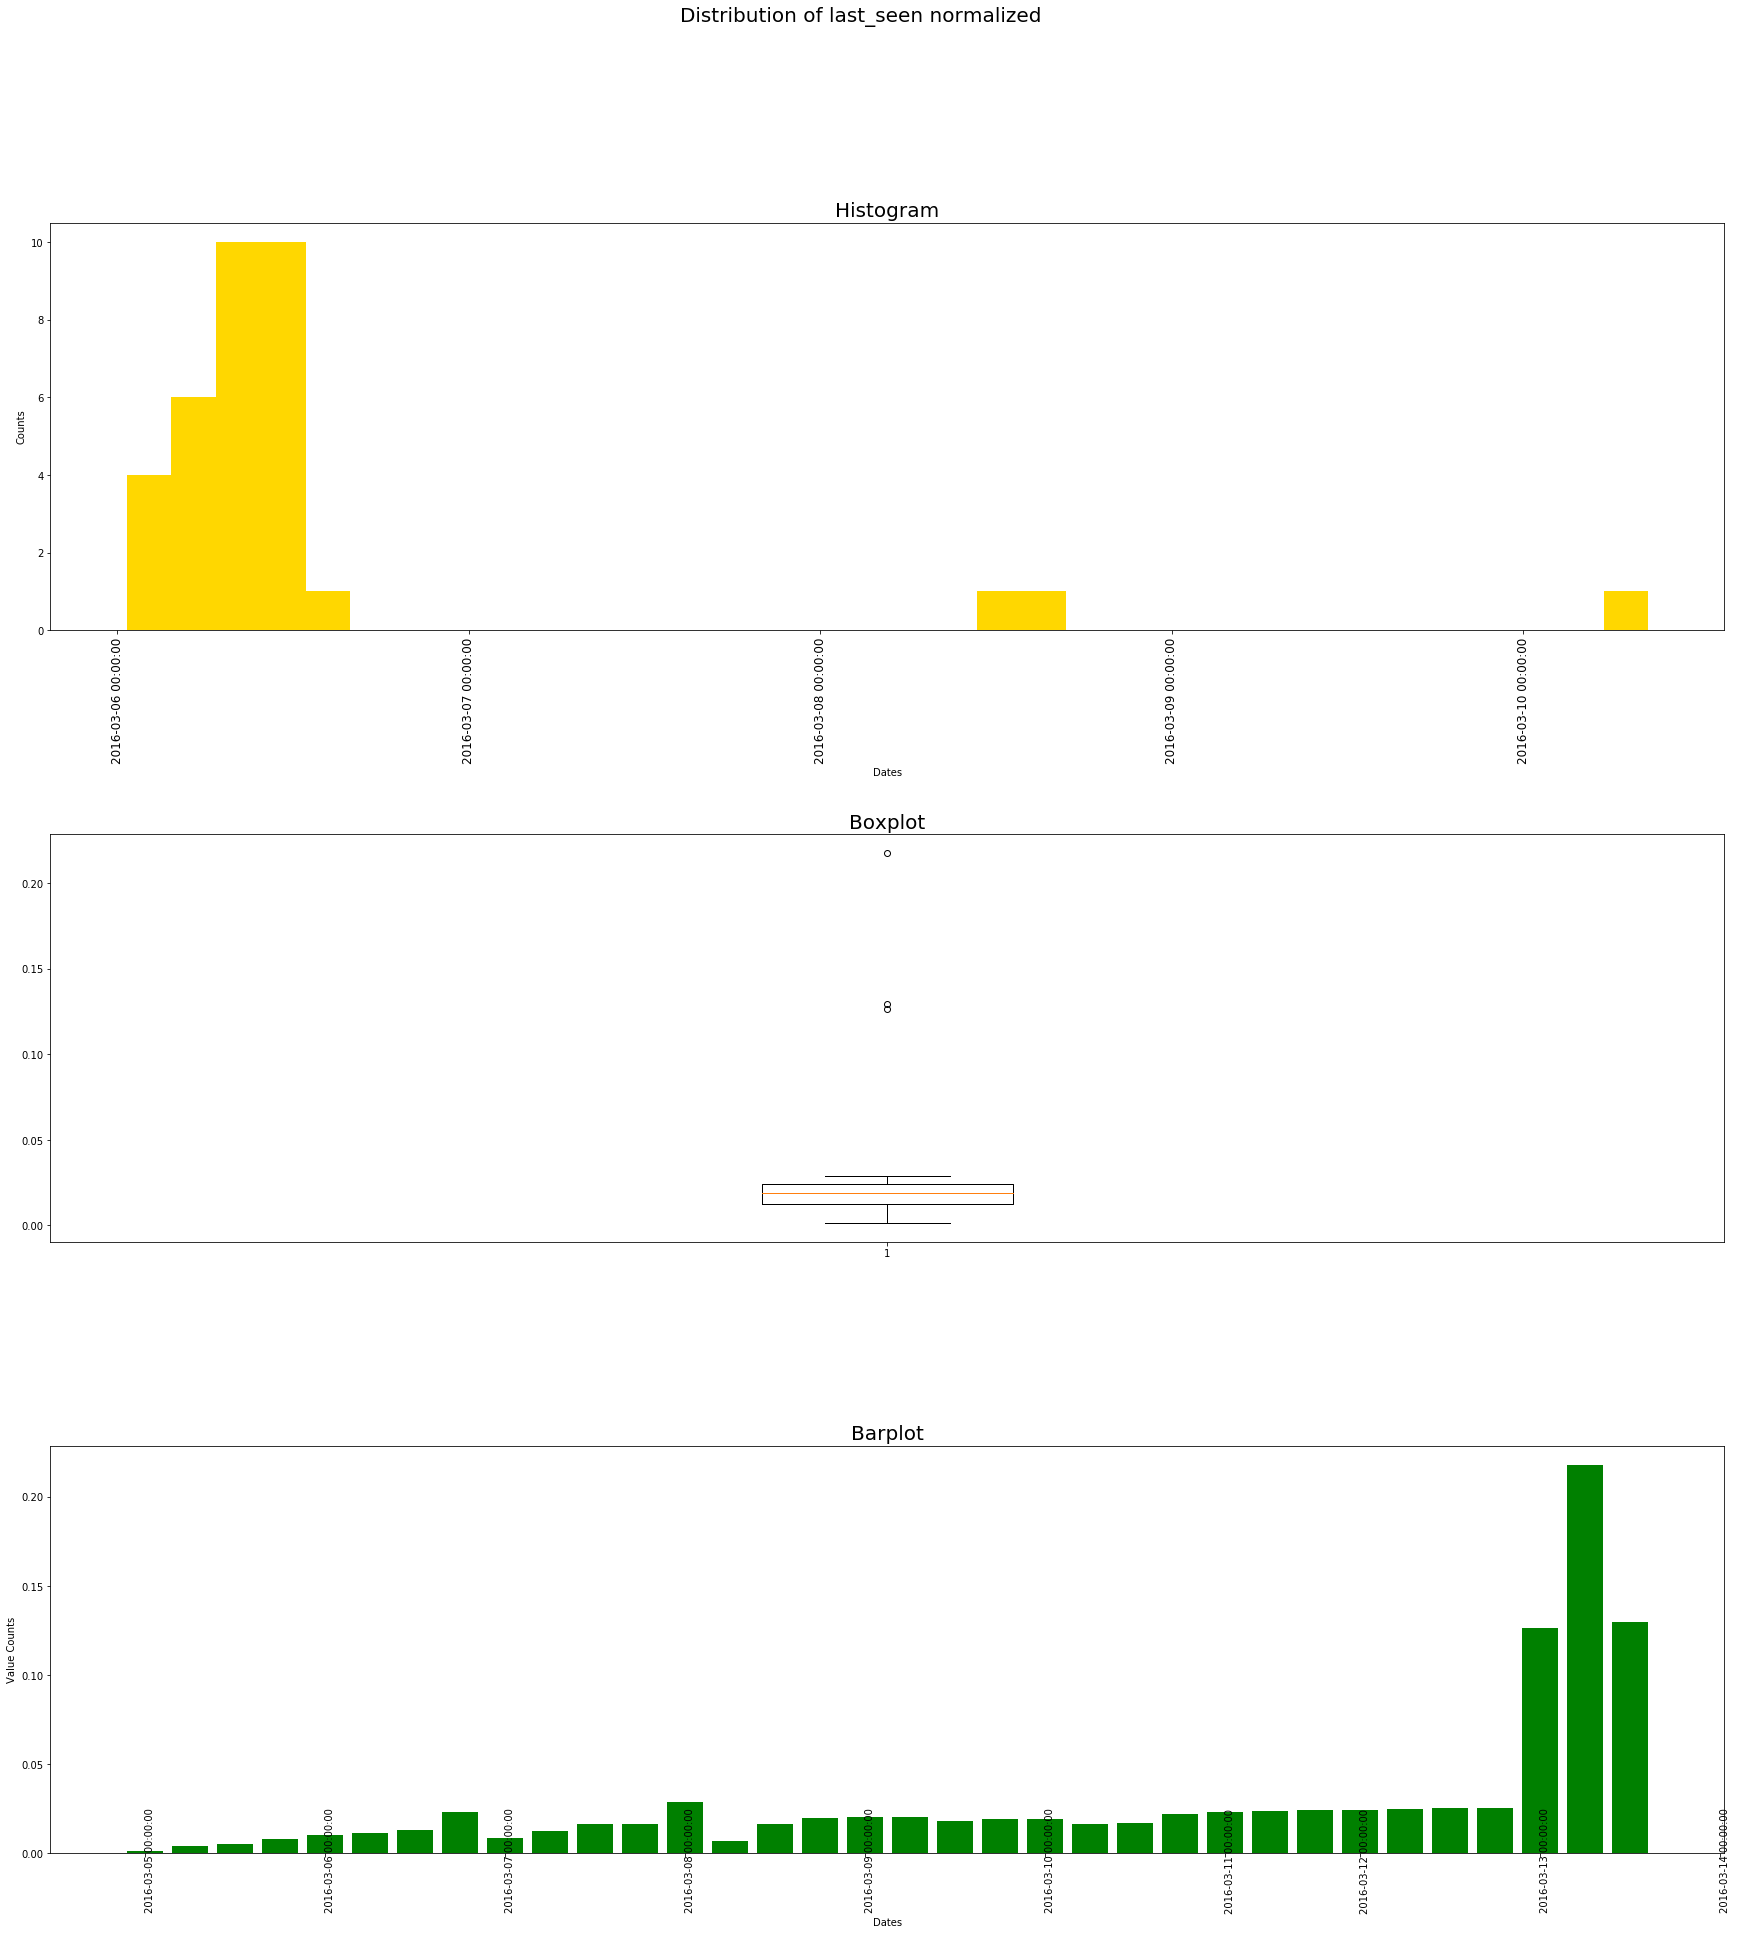

In [87]:
# last_dis_norm_5555_index
# last_dis_norm_5555

    
create_plots("Distribution of last_seen normalized", 
             last_dis_norm_5555_index, last_dis_norm_5555)

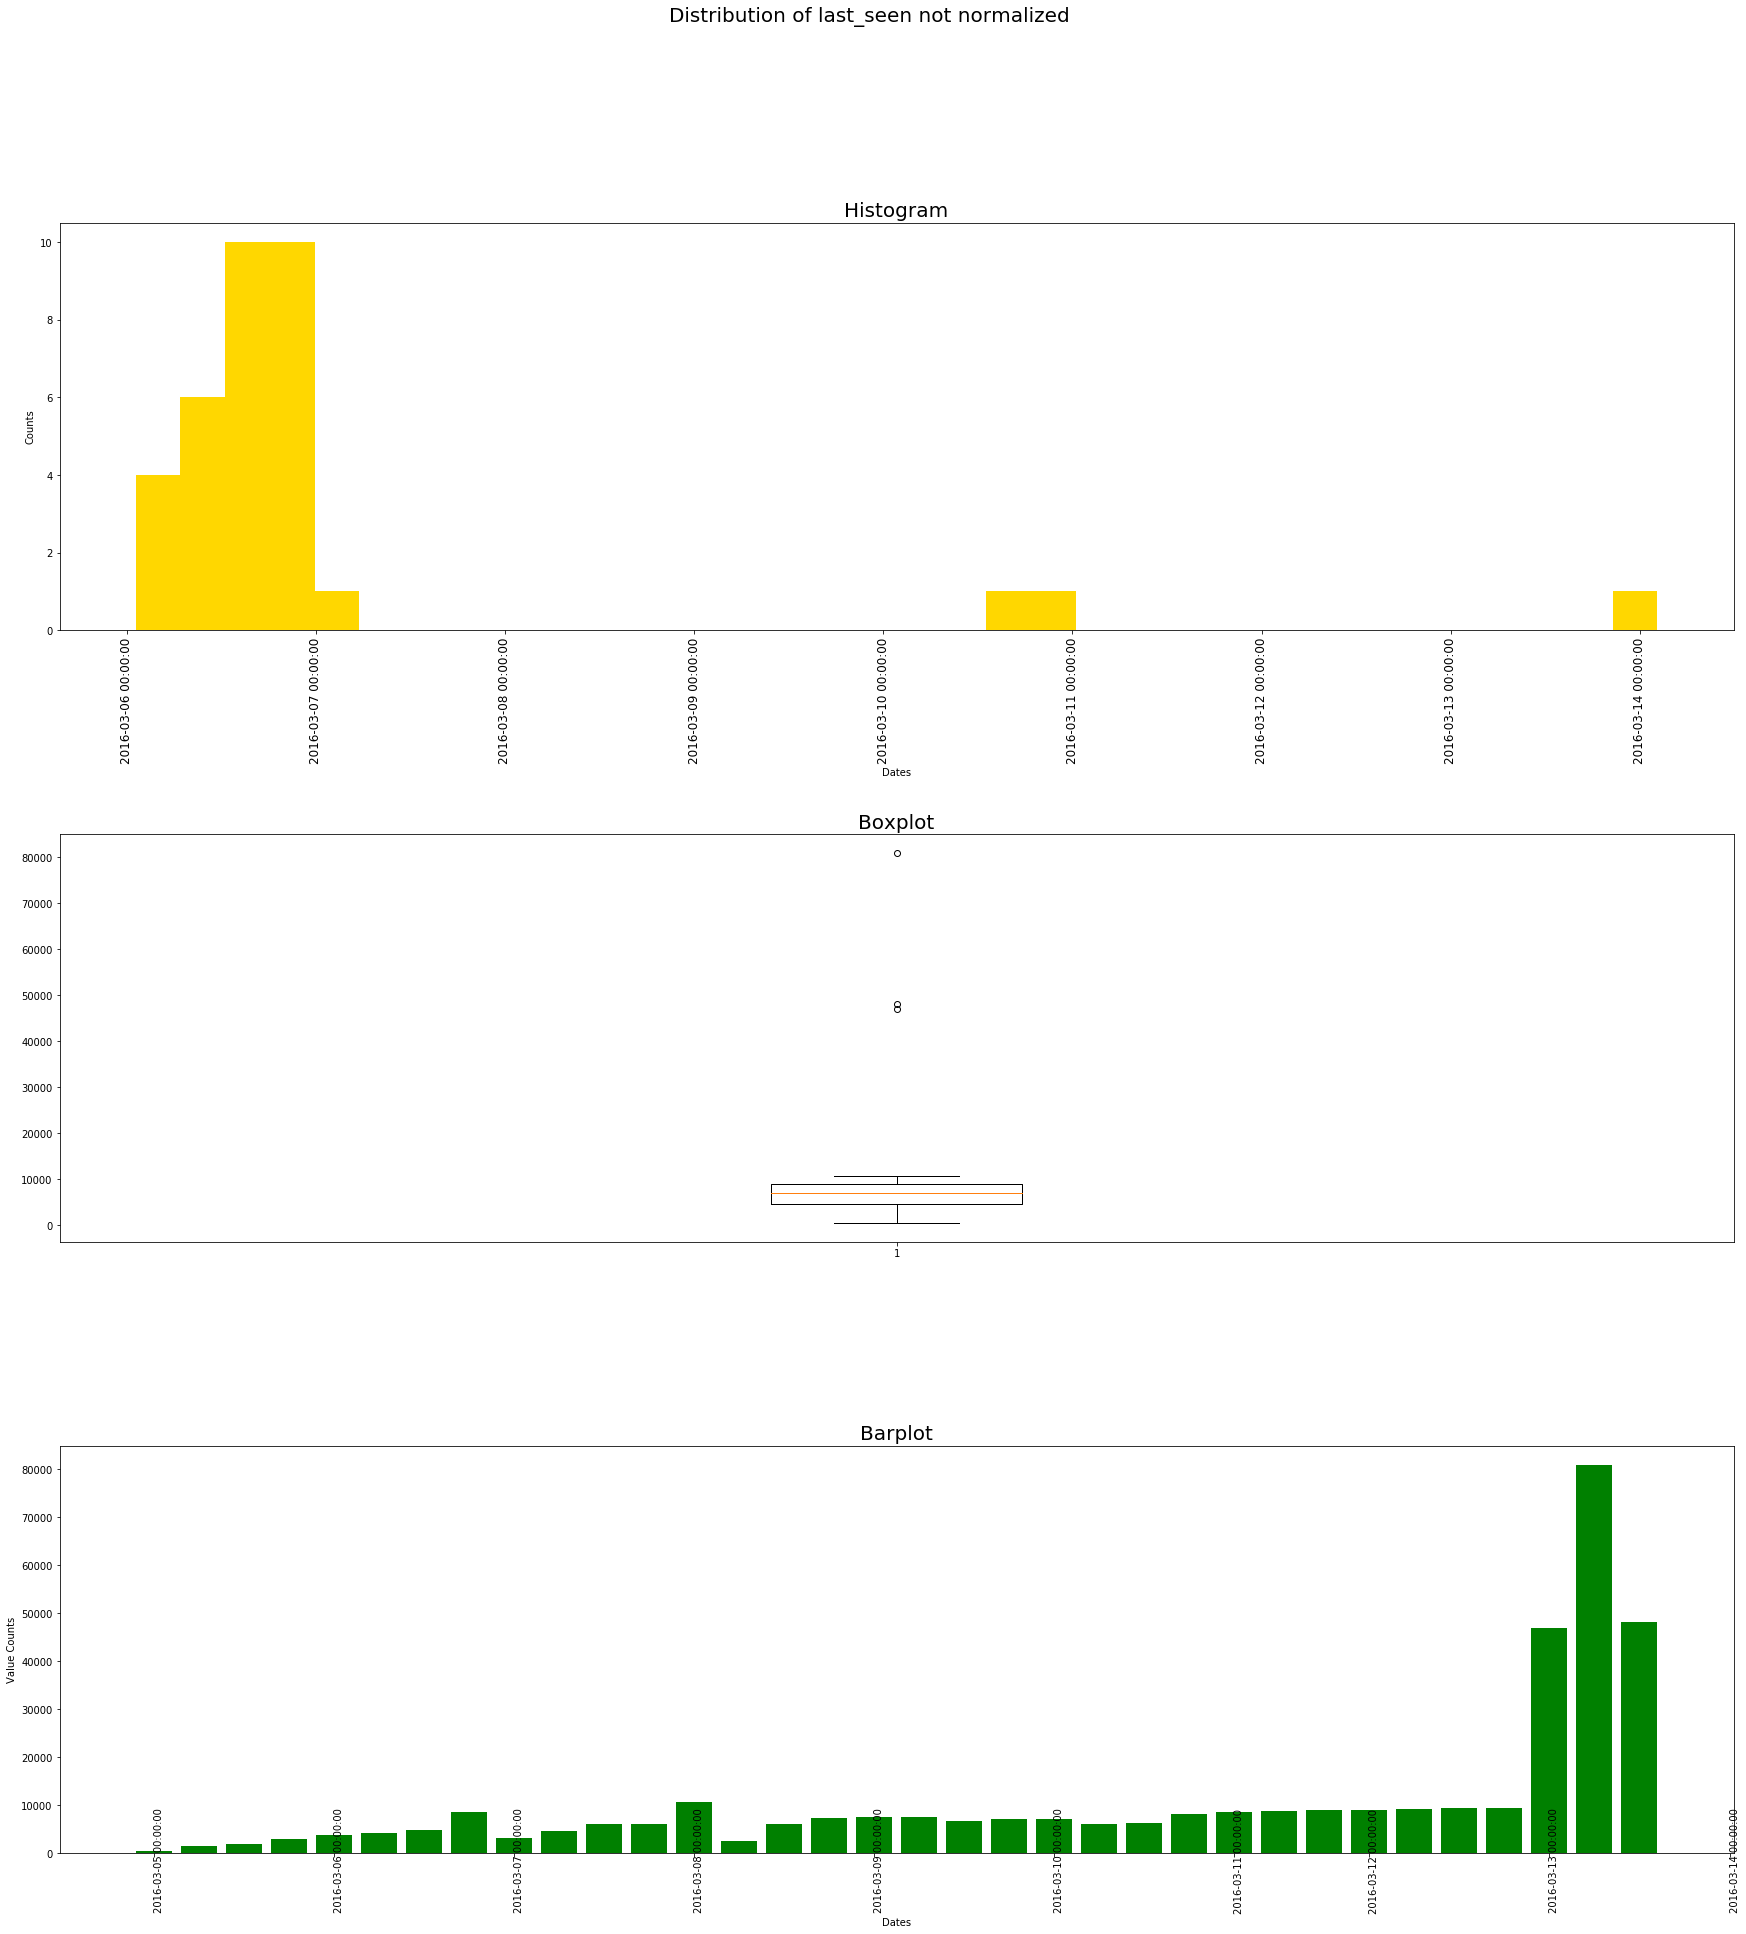

In [88]:
# last_dis_5555
# last_dis_5555_index 

create_plots("Distribution of last_seen not normalized", last_dis_5555_index, last_dis_5555)

#### Explore registration_year

In [89]:
autos["registration_year"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

1000    38
1001     1
1039     1
1111     4
1200     1
Name: registration_year, dtype: int64
9000     5
9229     1
9450     1
9996     1
9999    27
Name: registration_year, dtype: int64
155


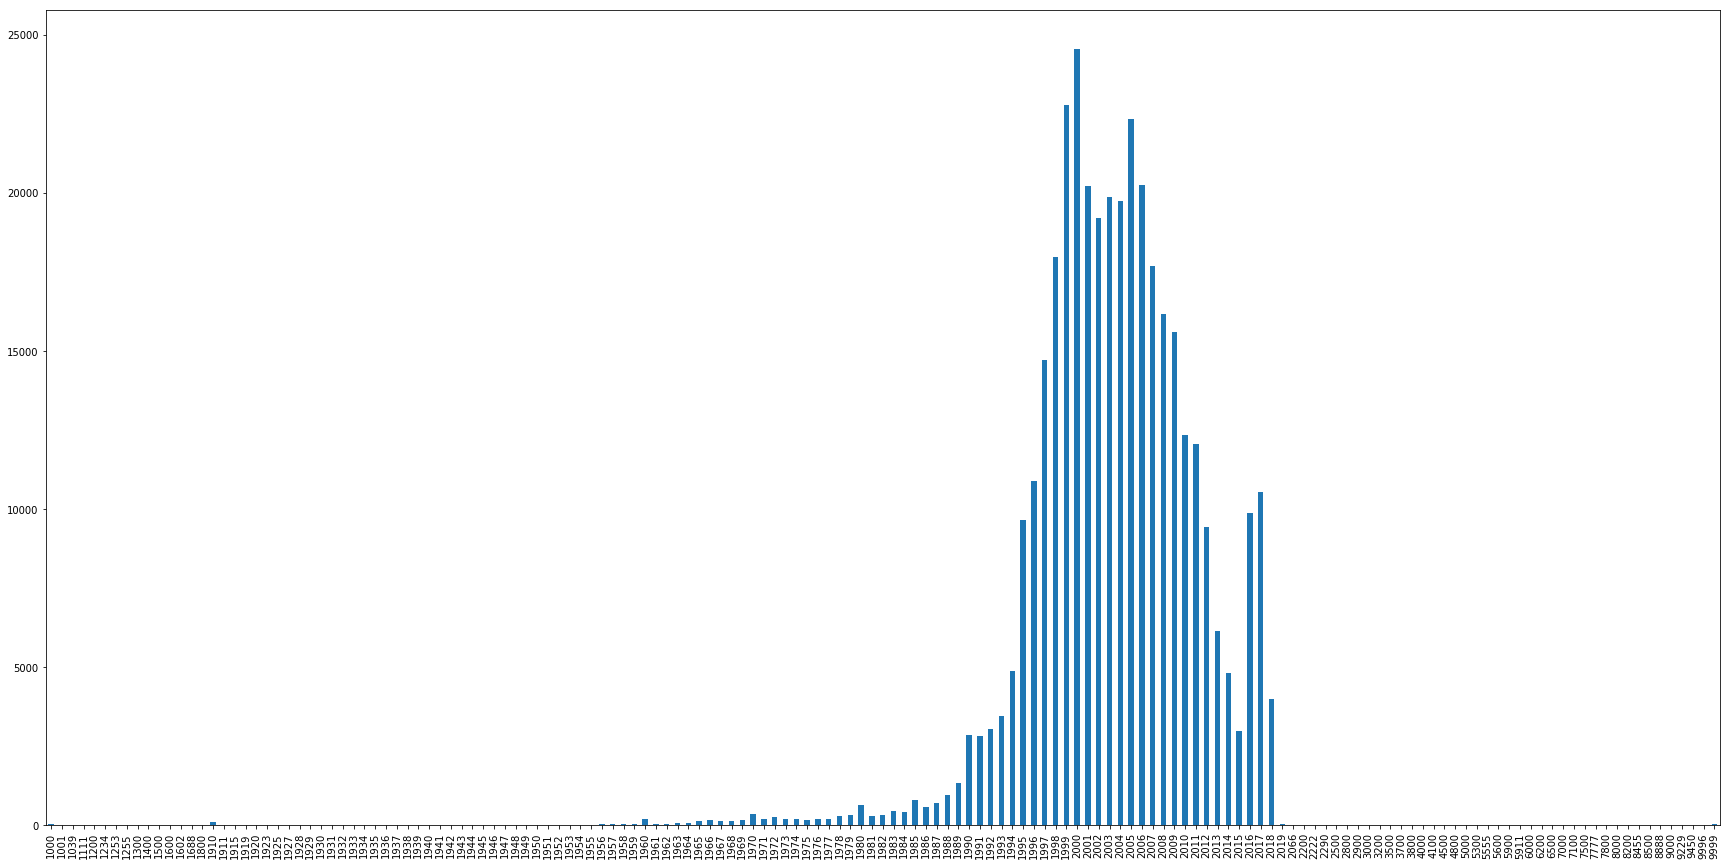

In [90]:
autos777 = autos

regyear_777 = autos777["registration_year"].value_counts().sort_index()

print(regyear_777.head())
print(regyear_777.tail())
print(len(regyear_777))

regyear_777.plot(kind="bar", figsize=(30,15))

In [91]:
regyear_888 = autos777["registration_year"].value_counts().sort_values(inplace=False)

print(regyear_888.head())
print(regyear_888.tail())
print(len(regyear_888))

8455    1
3700    1
2290    1
8200    1
8500    1
Name: registration_year, dtype: int64
2001    20218
2006    20230
2005    22316
1999    22767
2000    24551
Name: registration_year, dtype: int64
155


In [92]:
regyear_777_index = regyear_777.index

print(regyear_777_index[0:5])
print(len(regyear_777_index))

Int64Index([1000, 1001, 1039, 1111, 1200], dtype='int64')
155


Text(0.5, 1.0, 'Barplot')

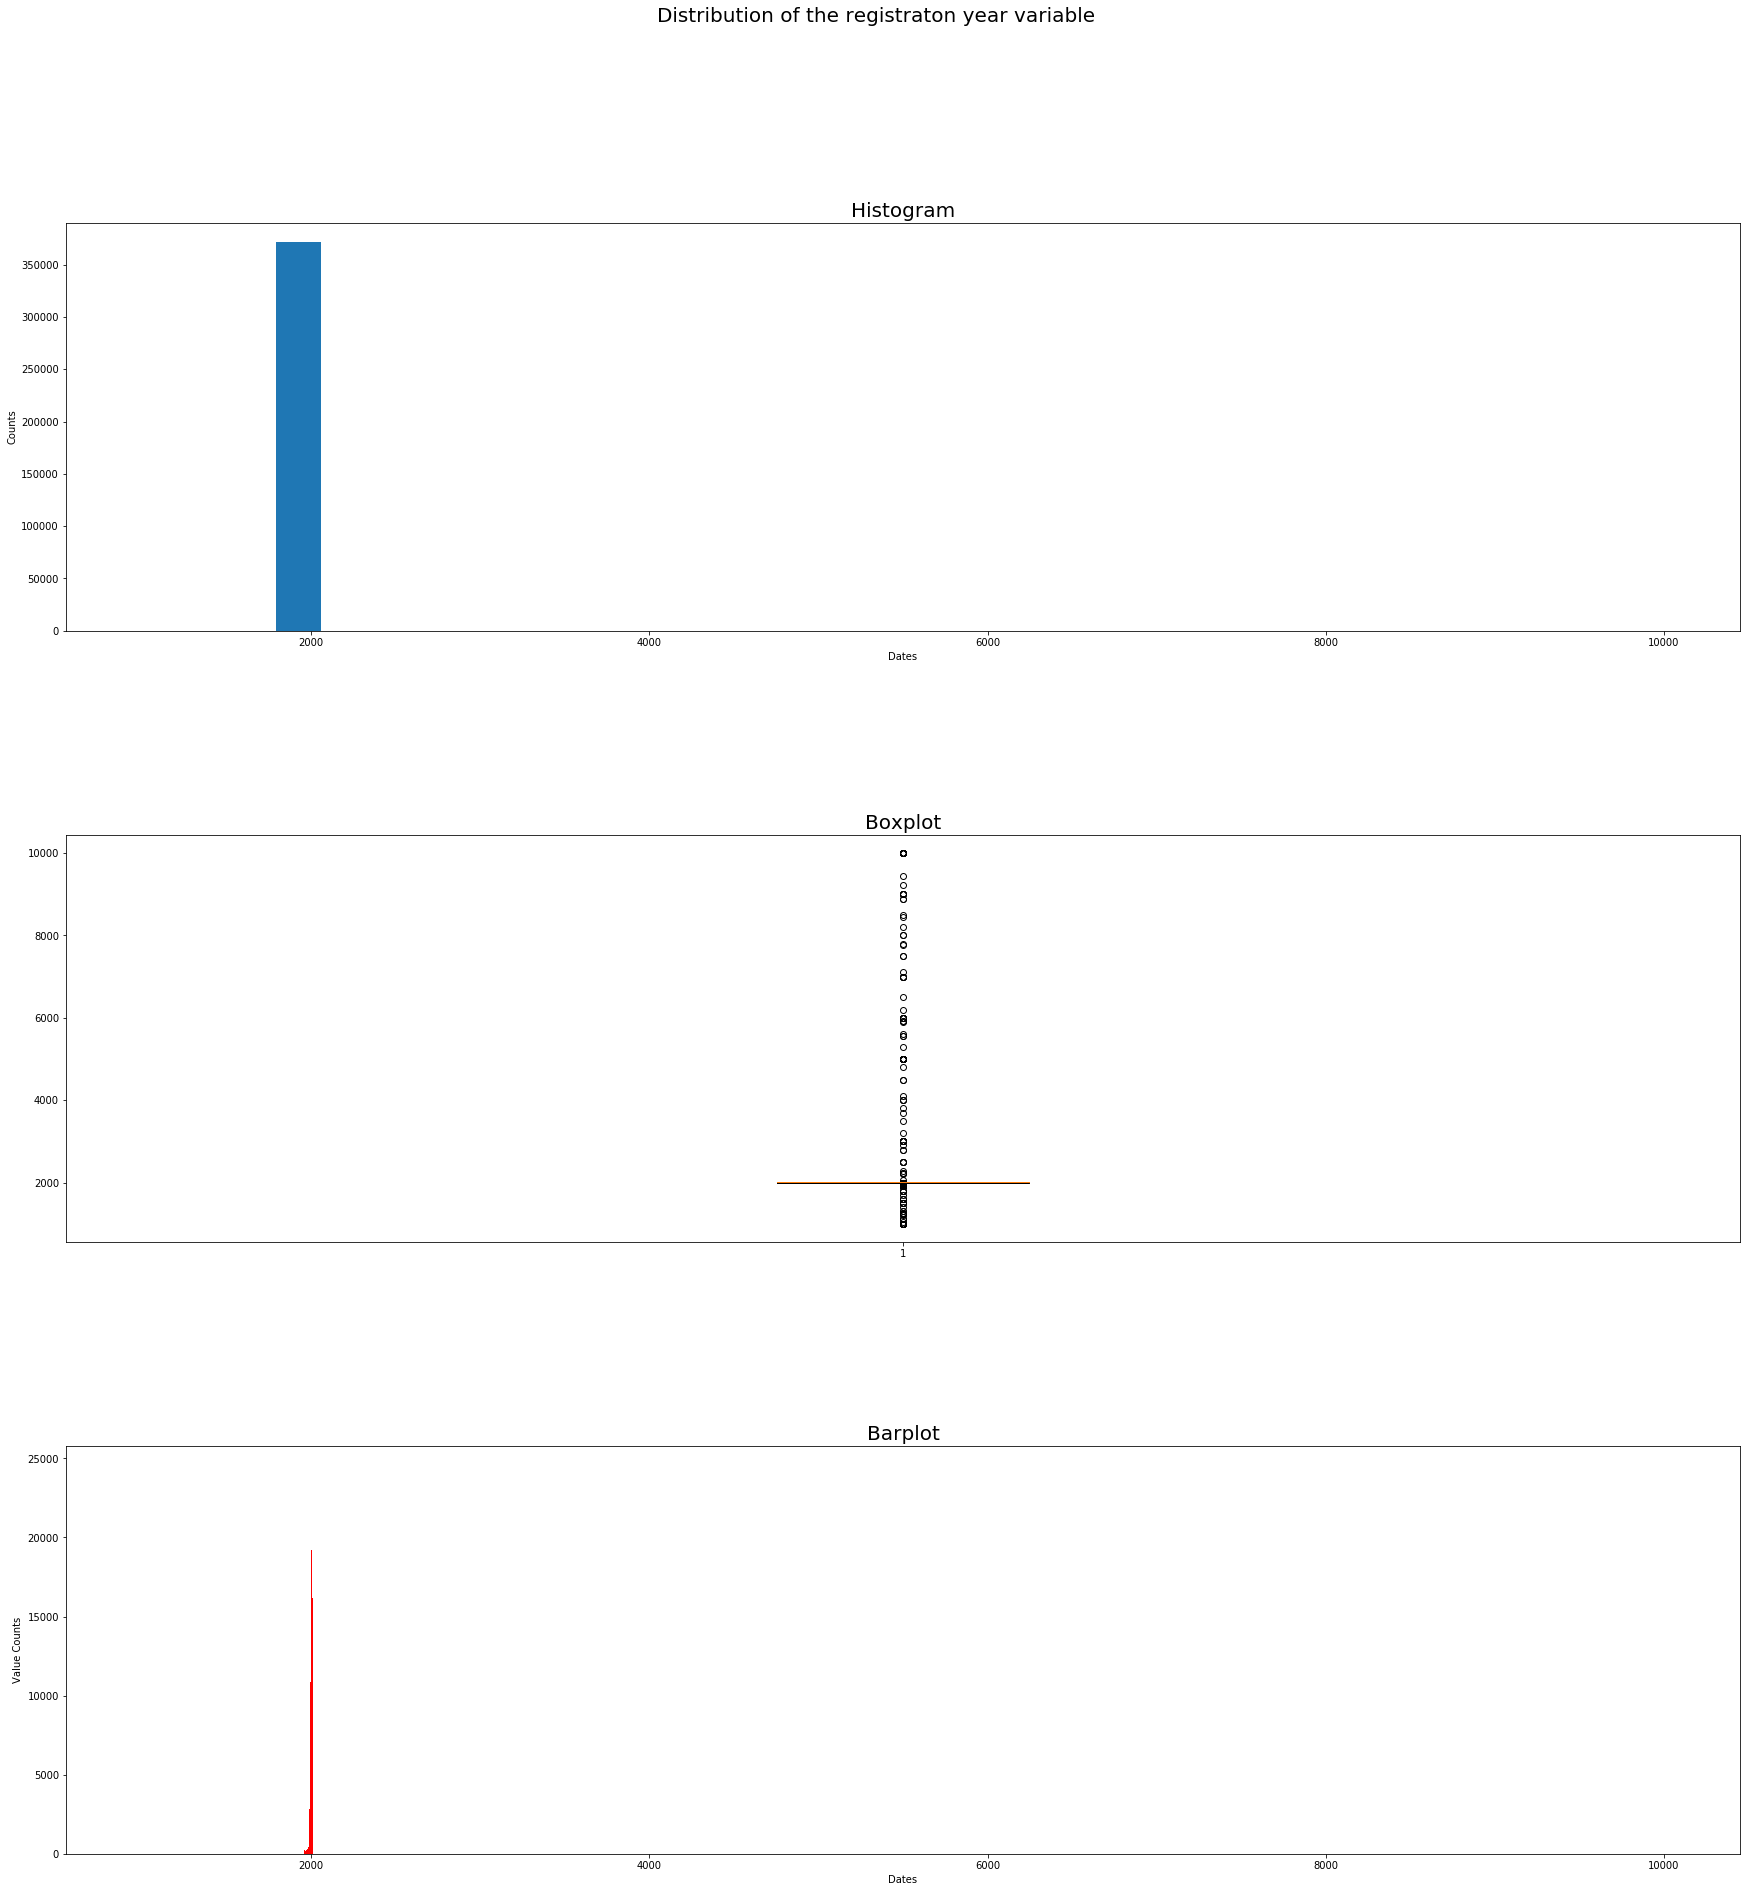

In [93]:
fig=plt.figure(figsize=(30,30))
fig.suptitle('Distribution of the registraton year variable', fontsize=20)
plt.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.hist(x=autos777["registration_year"], bins=34)
ax2.boxplot(x=autos777["registration_year"])
ax3.bar(regyear_777_index, regyear_777, color="red")


# Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)
ax1.set_xlabel(xlabel="Dates")
ax1.set_ylabel(ylabel="Counts")
ax3.set_xlabel(xlabel="Dates")
ax3.set_ylabel(ylabel="Value Counts")

# ax1.title.set_text('First Plot')
ax1.set_title('Histogram', fontdict ={'fontsize': 20})
ax2.set_title('Boxplot', fontdict ={'fontsize': 20})
ax3.set_title('Barplot', fontdict ={'fontsize': 20})



(array([  6.80000000e+01,   3.71355000e+05,   1.20000000e+01,
          8.00000000e+00,   2.00000000e+01,   1.30000000e+01,
          6.00000000e+00,   6.00000000e+00,   1.00000000e+01,
          3.00000000e+01]),
 array([ 1000. ,  1899.9,  2799.8,  3699.7,  4599.6,  5499.5,  6399.4,
         7299.3,  8199.2,  9099.1,  9999. ]),
 <a list of 10 Patch objects>)

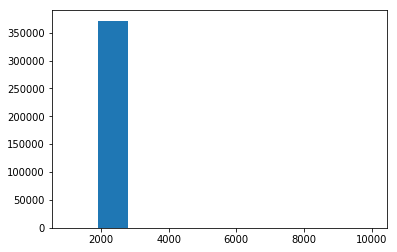

In [94]:
plt.hist(autos777["registration_year"])
# The range between registration 1000 (10th century) and 9999 (future)
# is large, while most values are occurring within 1950 to 2016

In [95]:
# df[df["col"].between(x,y)]
autos777_subset = autos777[autos777["registration_year"].
                           between(1950, 2016)]

# print(autos777_subset.head())

print(len(autos777_subset))

Excluded_observations = len(autos777)-len(autos777_subset)
print("Excluded observations: {}".format(Excluded_observations))

356559
Excluded observations: 14969


(array([    145.,     501.,     804.,    1568.,    2060.,    5244.,
          37595.,  119382.,  131620.,   57640.]),
 array([ 1950. ,  1956.6,  1963.2,  1969.8,  1976.4,  1983. ,  1989.6,
         1996.2,  2002.8,  2009.4,  2016. ]),
 <a list of 10 Patch objects>)

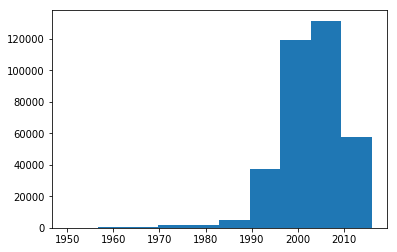

In [96]:
plt.hist(autos777_subset["registration_year"])
# After subsetting the plot is condensed

In [97]:
# Explore brand
print(autos["brand"].unique())
print(autos.info())



['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat' 'mini'
 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_Type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
odometer         

brand
volkswagen        75751
bmw               39129
opel              38178
mercedes_benz     34227
audi              31872
ford              24536
renault           16965
peugeot           10649
fiat               9184
seat               6647
skoda              5497
mazda              5476
smart              5032
citroen            4944
nissan             4841
toyota             4547
sonstige_autos     3723
hyundai            3505
mini               3286
volvo              3257
mitsubishi         2948
honda              2707
kia                2454
alfa_romeo         2263
suzuki             2254
porsche            2194
chevrolet          1784
chrysler           1404
dacia               874
daihatsu            780
jeep                773
land_rover          762
subaru              757
jaguar              614
trabant             572
saab                518
daewoo              513
rover               463
lancia              461
lada                218
Name: brand, dtype: int64


Text(0.5, 0, 'Automotive brands')

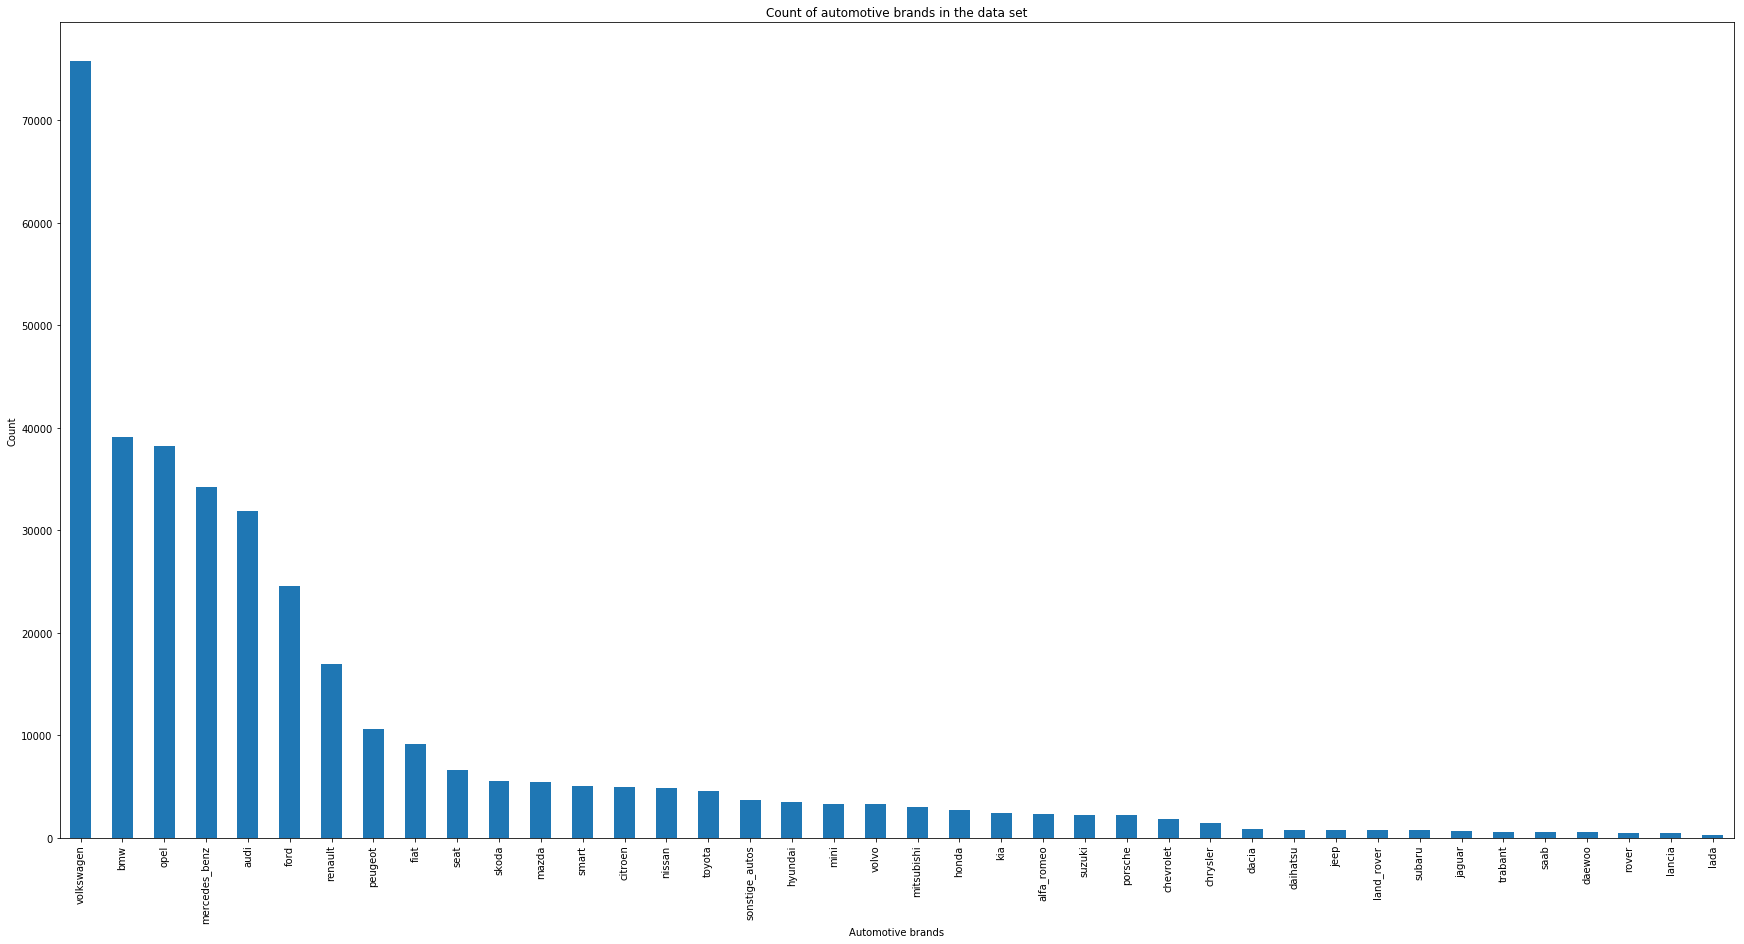

In [98]:
brand_count_122 = (autos777_subset.groupby("brand")
                   ["brand"].count().sort_values(ascending=False))
print(brand_count_122)

brand_count_122.plot(kind="bar", 
                     title='Count of automotive brands in the data set',
                     figsize=(30,15))
plt.ylabel("Count")
plt.xlabel("Automotive brands")

brand
sonstige_autos    655356.113618
porsche            51301.345943
alfa_romeo         36929.463102
trabant            21046.159091
mercedes_benz      17606.484033
land_rover         16823.683727
audi               16220.898814
bmw                14799.506095
jaguar             14232.819218
volkswagen         13512.219152
jeep               12229.642950
mini                9979.384967
citroen             9174.252023
ford                8693.278000
chevrolet           7434.816704
skoda               6460.418046
dacia               5861.871854
mazda               5796.058619
kia                 5719.187042
hyundai             5490.765193
toyota              5264.523422
volvo               5100.101627
nissan              4585.395993
seat                4420.369039
suzuki              4401.918811
subaru              4252.754293
fiat                4144.854203
chrysler            3908.398148
saab                3879.231660
honda               3863.605098
smart               3586.280803
mi

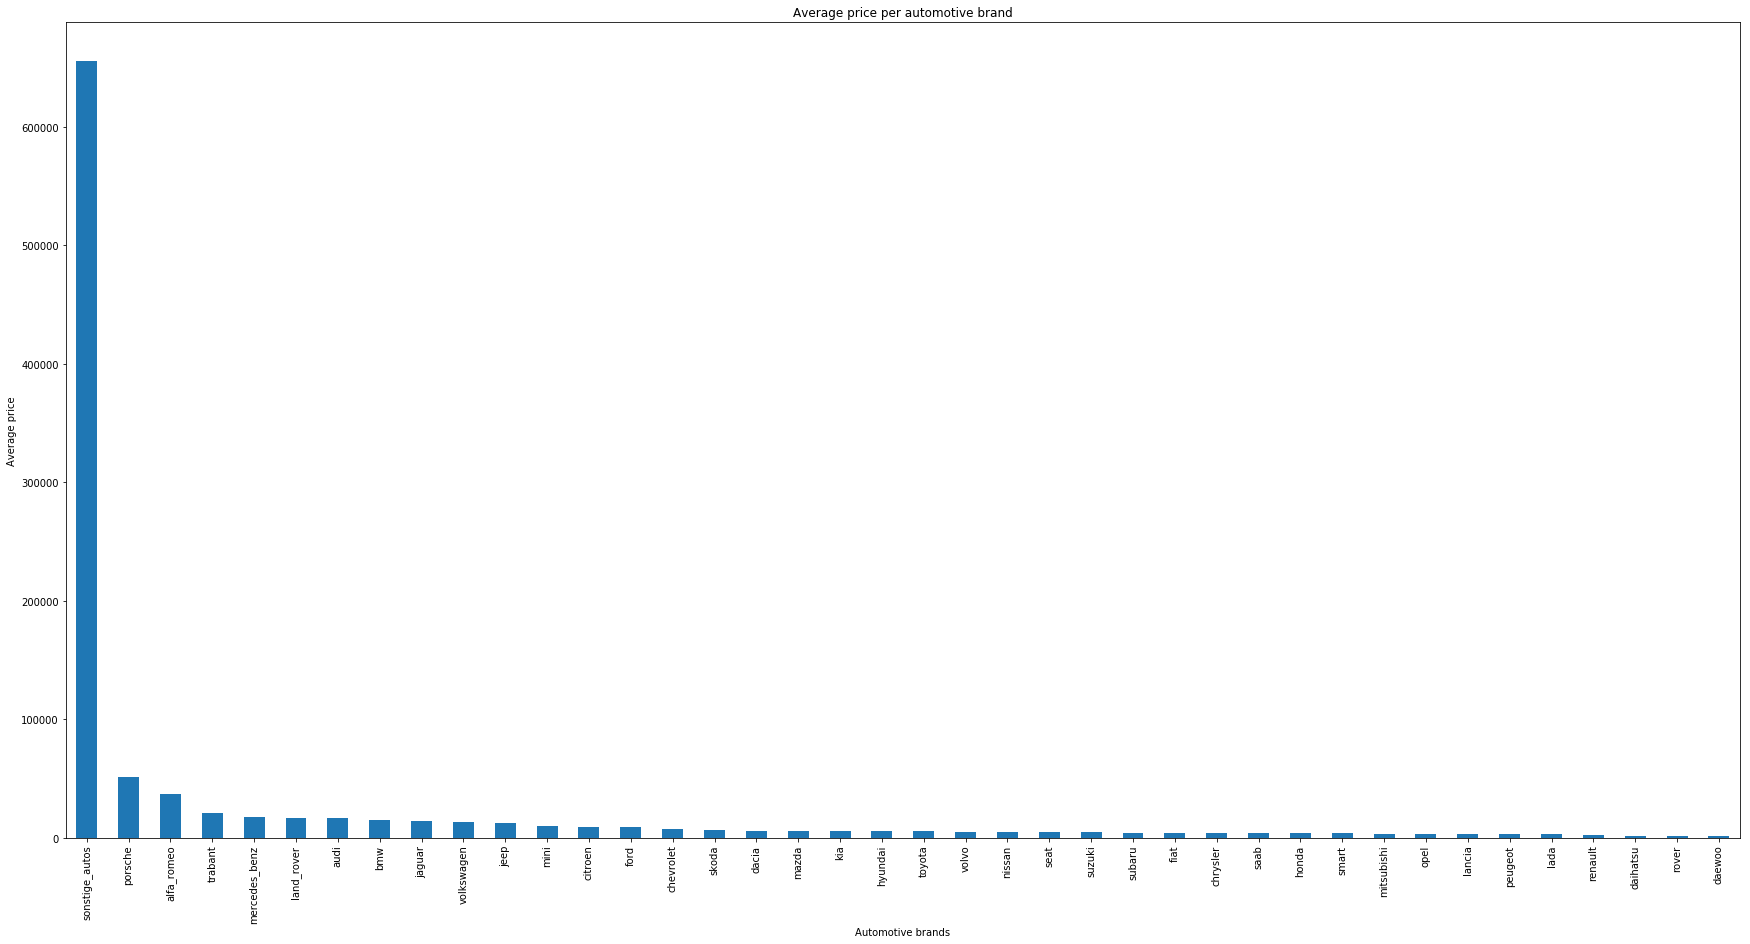

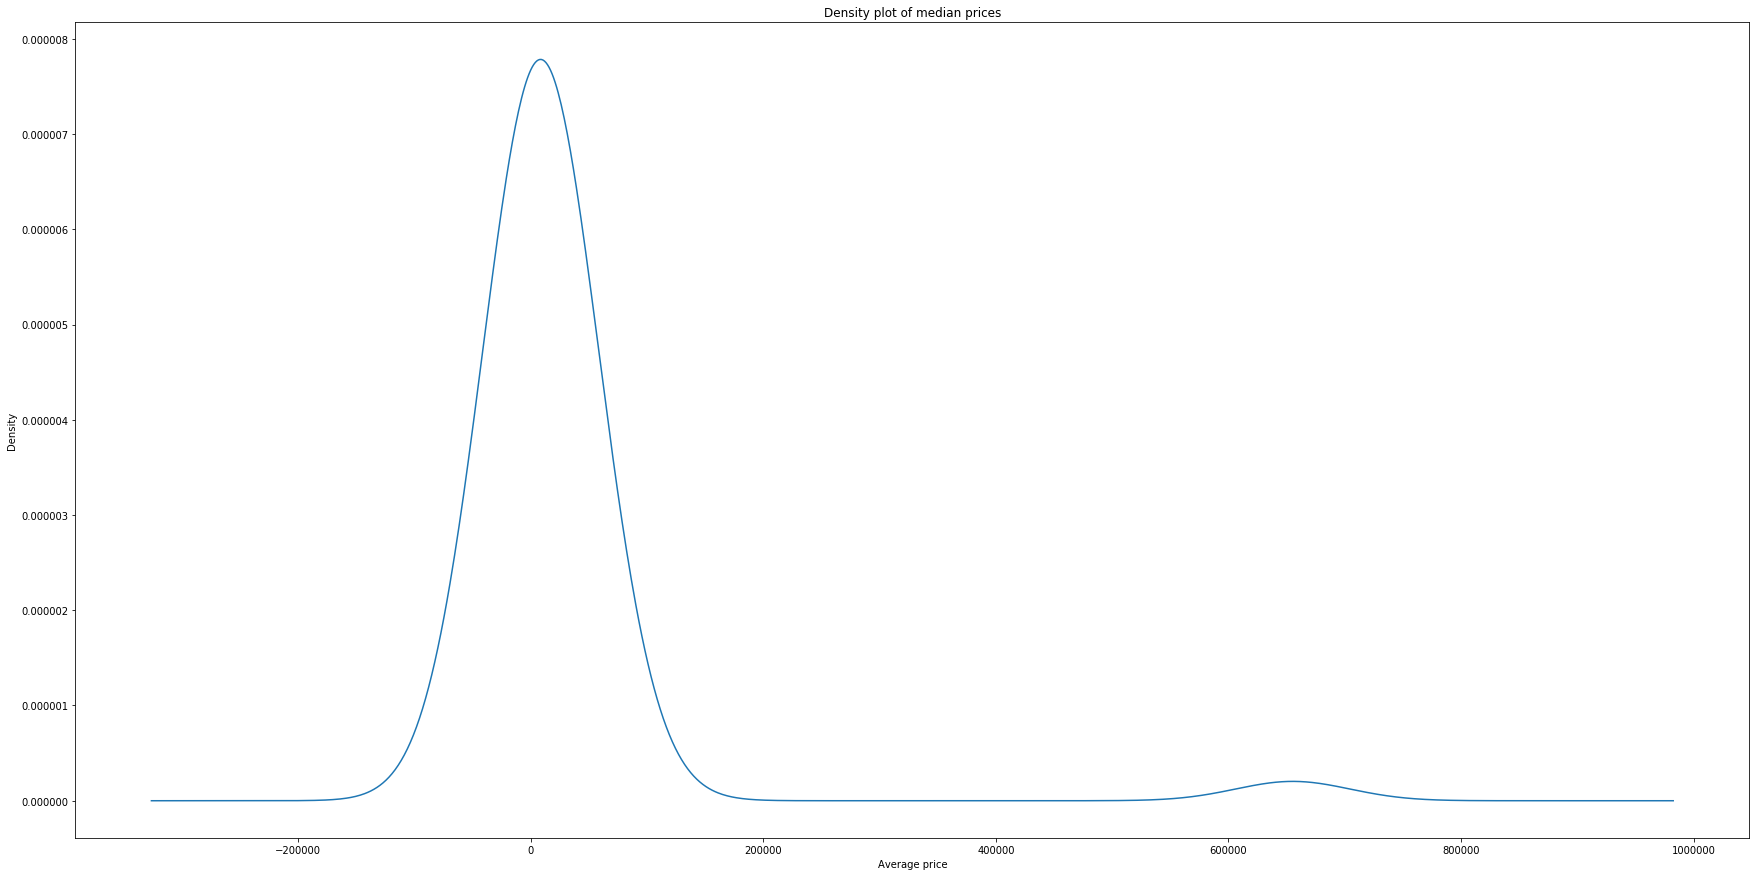

In [99]:
brand_mean_122 = (autos777_subset.groupby("brand")["price"]
                  .mean().sort_values(ascending=False))

print(brand_mean_122)

brand_mean_122.plot(kind="bar", title="Average price per automotive brand",
                    figsize=(30,15))
plt.ylabel("Average price")
plt.xlabel("Automotive brands")
plt.show()

brand_mean_122.plot(kind="kde", 
                    title="Density plot of median prices",
                    figsize=(30,15))
plt.xlabel("Average price")
plt.show()

brand
porsche           30000.0
land_rover        12500.0
mini               8700.0
jeep               7300.0
jaguar             6000.0
audi               5800.0
bmw                5650.0
mercedes_benz      4999.0
skoda              4999.0
dacia              4872.5
sonstige_autos     4800.0
chevrolet          4494.5
toyota             4000.0
hyundai            3999.0
kia                3700.0
suzuki             2998.0
smart              2900.0
volkswagen         2900.0
seat               2600.0
volvo              2600.0
citroen            2500.0
lada               2500.0
saab               2500.0
mazda              2400.0
alfa_romeo         2300.0
honda              2299.0
chrysler           2222.0
peugeot            2200.0
nissan             2000.0
subaru             1700.0
ford               1699.0
mitsubishi         1547.5
opel               1500.0
fiat               1500.0
renault            1300.0
lancia             1190.0
daihatsu            999.0
daewoo              990.0
rover 

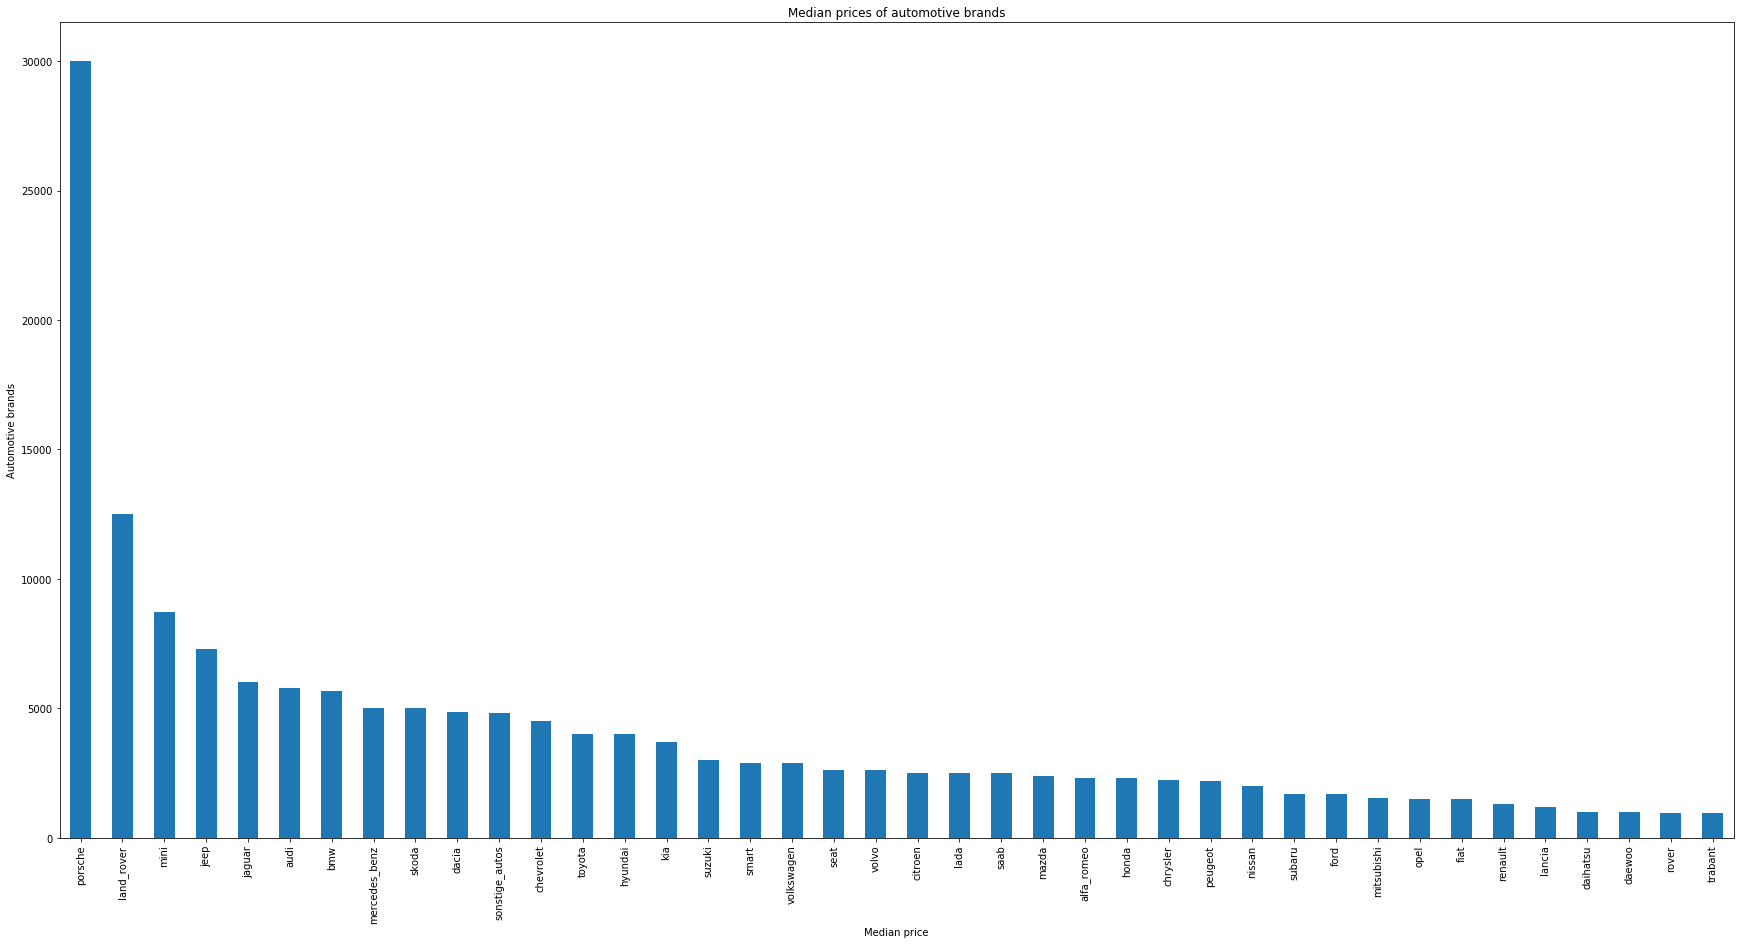

In [100]:


brand_mean_122 = (autos777_subset.groupby("brand")["price"]
                  .quantile(q=0.5).sort_values(ascending=False))

print(brand_mean_122)

brand_mean_122.plot(kind="bar", title="Median prices of automotive brands",
                    figsize=(30,15))
plt.xlabel("Median price")
plt.ylabel("Automotive brands")
plt.show()

In [101]:
# Group by brand and then by fuel type
# autos.info()

br_count_fuel_9999 = (autos.groupby(["brand", "fuel_type"])["fuel_type"].
                      count().sort_values(ascending=False))

print(type(br_count_fuel_9999))
print(br_count_fuel_9999.head(n=10))

br_count_fuel_9999_index = br_count_fuel_9999.sort_index()
print(br_count_fuel_9999_index.head(n=10))


<class 'pandas.core.series.Series'>
brand          fuel_type
volkswagen     benzin       43956
opel           benzin       28261
volkswagen     diesel       27370
bmw            benzin       22252
mercedes_benz  benzin       17943
ford           benzin       16021
audi           benzin       15536
               diesel       14564
mercedes_benz  diesel       14231
bmw            diesel       14203
Name: fuel_type, dtype: int64
brand       fuel_type
alfa_romeo  benzin        1471
            diesel         611
            lpg             37
audi        andere           5
            benzin       15536
            cng              4
            diesel       14564
            elektro          2
            hybrid           6
            lpg            470
Name: fuel_type, dtype: int64


In [102]:
# Print hierachial index
print(br_count_fuel_9999_index.index[0:10])

MultiIndex(levels=[['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai', 'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda', 'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant', 'volkswagen', 'volvo'], ['andere', 'benzin', 'cng', 'diesel', 'elektro', 'hybrid', 'lpg']],
           labels=[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 3, 6, 0, 1, 2, 3, 4, 5, 6]],
           names=['brand', 'fuel_type'])


In [103]:
# Slicing by outer index
print("Audi: ", br_count_fuel_9999_index.loc["audi"])
print("Nissan & Saab: ", br_count_fuel_9999_index.loc[["nissan", 'saab']] )
print

Audi:  fuel_type
andere         5
benzin     15536
cng            4
diesel     14564
elektro        2
hybrid         6
lpg          470
Name: fuel_type, dtype: int64
Nissan & Saab:  brand   fuel_type
nissan  andere          2
        benzin       3445
        cng             4
        diesel       1071
        elektro         2
        hybrid          1
        lpg            61
saab    andere          1
        benzin        389
        diesel         90
        lpg            13
Name: fuel_type, dtype: int64


<function print>

In [104]:
# Fancy indexing (outermost index)
print(br_count_fuel_9999_index.loc[('alfa_romeo', 'benzin'),])


1471


In [105]:
print(br_count_fuel_9999_index.loc[(['alfa_romeo','fiat'], 'lpg'),])

brand       fuel_type
alfa_romeo  lpg          37
fiat        lpg          68
Name: fuel_type, dtype: int64


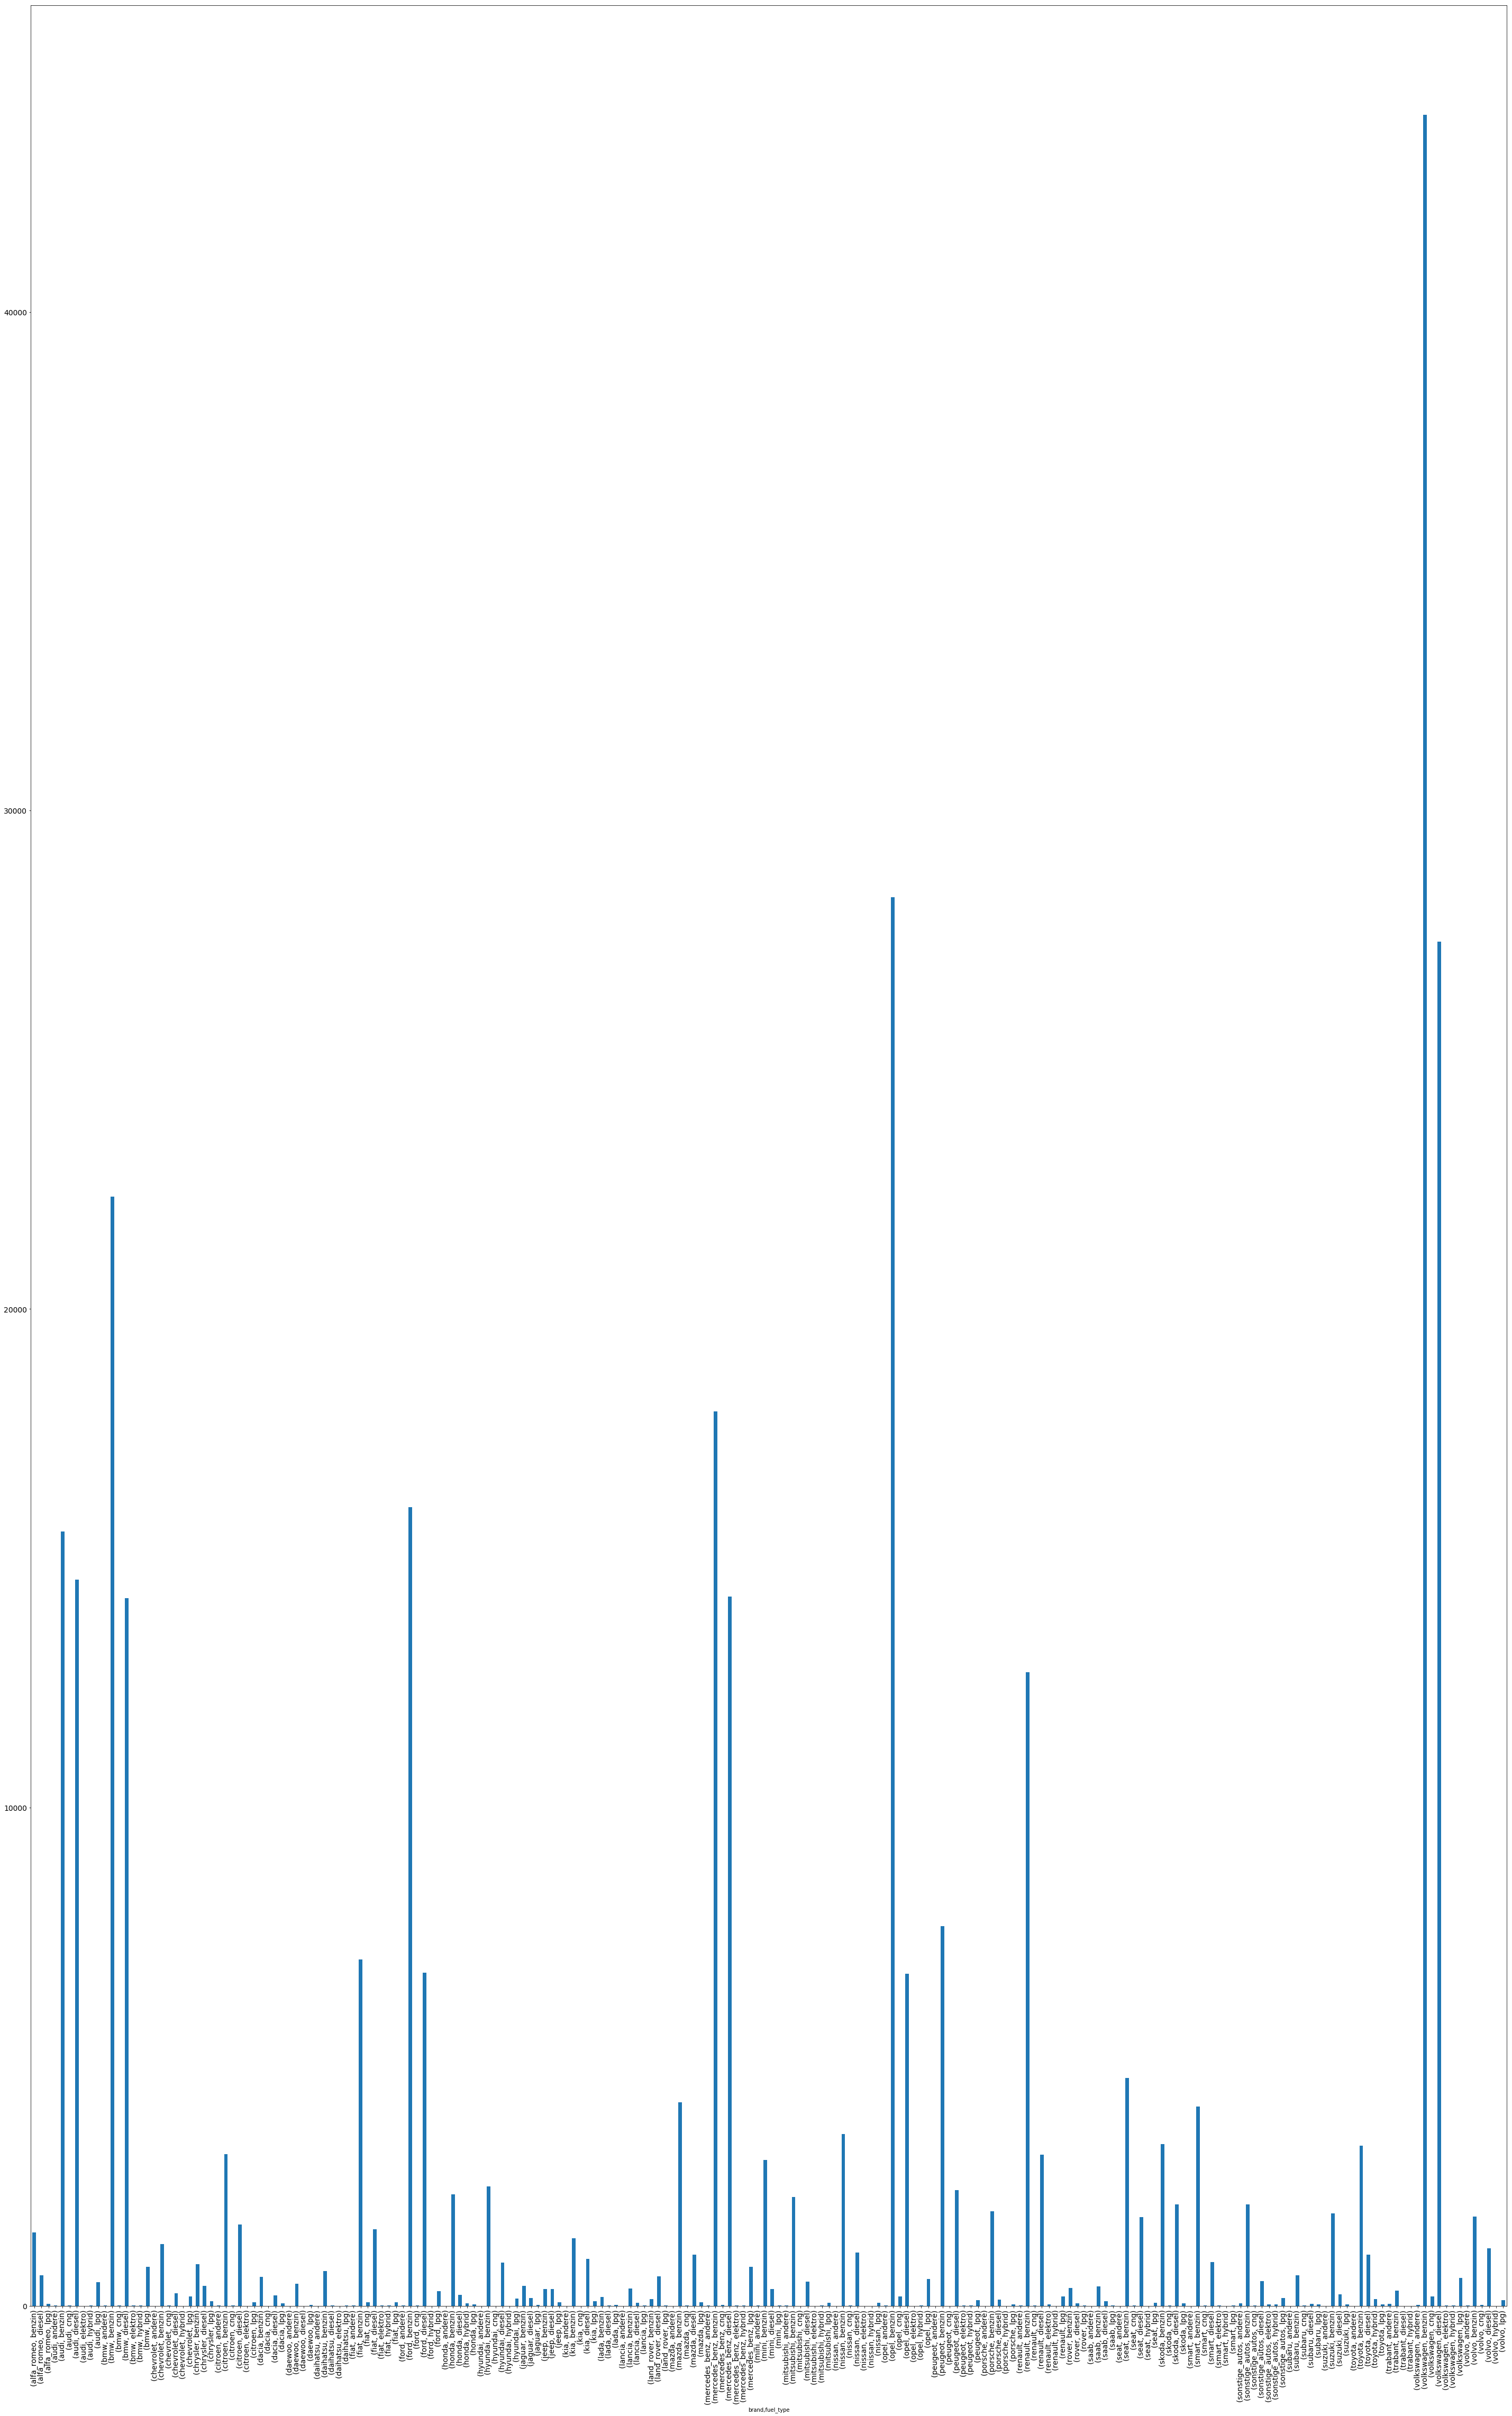

In [106]:
br_count_fuel_9999_index.plot(kind="bar", figsize=(50, 80), fontsize=14)

In [107]:
# What do I want to do?
# Mean price by automotive brand with a for loop?

unique_auto_brands = autos["brand"].unique()
print(unique_auto_brands)
print(type(unique_auto_brands))


# Understand logic
# Instead using variable representation with a foor loop using a value (peugeot)
# Extract one brand: peugeot

peugeot = autos[autos["brand"]=="peugeot"].reset_index(drop=True)
print(type(peugeot))
print(peugeot[["registration_year", "brand", "gearbox"]][0:5])
# Reset index
print(peugeot.loc[0:5, ["registration_year", "brand", "gearbox"]])
# Calculate mean
peu_mean = peugeot["price"].mean()
print(peu_mean)

# Append to list
peu_mean_list = []
peu_mean_list.append(peu_mean)
peu_mean_list.append("Peugeot")
print(peu_mean_list)


['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat' 'mini'
 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
   registration_year    brand  gearbox
0               2004  peugeot  manuell
1               2004  peugeot  manuell
2               1999  peugeot  manuell
3               2008  peugeot  manuell
4               1999  peugeot  manuell
   registration_year    brand  gearbox
0               2004  peugeot  manuell
1               2004  peugeot  manuell
2               1999  peugeot  manuell
3               2008  peugeot  manuell
4               1999  peugeot  manuell
5               2012  peugeot  manuell
3166.9815906411536
[3166.9815906411536, 'Peugeot']


In [108]:
# Calculate price mean grouped by brand with python for loop instead of pandas groupby

Average_price_brand = {}

for brand in unique_auto_brands:
    # Extract brands from df
    single_brand = autos[autos["brand"]==brand]
    # Compute mean price for a single brand
    mean = single_brand["price"].mean()
    Average_price_brand[brand] = round(mean, 2)
    
    
print(Average_price_brand)

{'volkswagen': 14533.5, 'audi': 15868.51, 'jeep': 12009.68, 'skoda': 6411.18, 'bmw': 14844.14, 'peugeot': 3166.98, 'ford': 8462.05, 'mazda': 5680.36, 'nissan': 4527.51, 'renault': 2334.26, 'mercedes_benz': 17244.06, 'opel': 3223.52, 'seat': 4356.67, 'citroen': 8880.62, 'honda': 3804.63, 'fiat': 5326.31, 'mini': 9846.43, 'smart': 3531.56, 'hyundai': 5415.06, 'sonstige_autos': 615647.62, 'alfa_romeo': 35737.17, 'subaru': 4248.95, 'volvo': 8774.01, 'mitsubishi': 3273.9, 'kia': 5656.57, 'suzuki': 4371.68, 'lancia': 3165.75, 'porsche': 51089.86, 'toyota': 5232.66, 'chevrolet': 7447.76, 'dacia': 5839.65, 'daihatsu': 1693.66, 'trabant': 20415.94, 'saab': 3820.04, 'chrysler': 3916.03, 'jaguar': 14228.08, 'daewoo': 1017.81, 'rover': 1508.02, 'land_rover': 16707.56, 'lada': 3037.44}


In [109]:
# Convert dict to pandas data frame
Av_pr_br_Series = pd.Series(Average_price_brand) 
print(Av_pr_br_Series[0:5])
print(Av_pr_br_Series.index[0:5])

alfa_romeo    35737.17
audi          15868.51
bmw           14844.14
chevrolet      7447.76
chrysler       3916.03
dtype: float64
Index(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler'], dtype='object')


In [110]:
# Calculate odometer mean grouped by brand with python for loop instead of pandas groupby

# Get the correct column name
# print(autos.columns)
# 'odometer'

Av_mileage_br = dict()

for brand in unique_auto_brands:
    single_brand = autos[autos["brand"]==brand]
    # single_brand is a data frame filtered by brand
    mean = single_brand["odometer"].mean()
    # write into dict
    Av_mileage_br[brand] = round(mean, 2)
    
print(Av_mileage_br)

# Convert dict to pd.Series

Av_mileage_br_Series = pd.Series(Av_mileage_br)
print(Av_mileage_br_Series[0:5])

{'volkswagen': 128575.21, 'audi': 129717.4, 'jeep': 120960.35, 'skoda': 113838.86, 'bmw': 132763.57, 'peugeot': 124970.07, 'ford': 123839.99, 'mazda': 125988.59, 'nissan': 119789.56, 'renault': 128049.14, 'mercedes_benz': 130664.7, 'opel': 128906.59, 'seat': 121473.94, 'citroen': 120512.35, 'honda': 125943.23, 'fiat': 116854.59, 'mini': 94668.53, 'smart': 100617.26, 'hyundai': 104695.56, 'sonstige_autos': 86519.34, 'alfa_romeo': 128842.22, 'subaru': 126046.21, 'volvo': 138140.97, 'mitsubishi': 126924.21, 'kia': 109643.84, 'suzuki': 107121.99, 'lancia': 124524.79, 'porsche': 98316.03, 'toyota': 117341.29, 'chevrolet': 100116.53, 'dacia': 86427.78, 'daihatsu': 119044.67, 'trabant': 55634.52, 'saab': 141216.98, 'chrysler': 134084.02, 'jaguar': 121940.42, 'daewoo': 123376.38, 'rover': 134602.04, 'land_rover': 119240.26, 'lada': 75266.67}
alfa_romeo    128842.22
audi          129717.40
bmw           132763.57
chevrolet     100116.53
chrysler      134084.02
dtype: float64


In [111]:
# Concatenate the two series into one df
# pd.concat([s1, s2], axis=1).reset_index()

Av_mileage_br_Series 
Av_pr_br_Series

df_av = pd.concat([Av_mileage_br_Series , Av_pr_br_Series], axis= 1 )
df_av.columns = ["Average mileage", "Average price"]
df_av = df_av.sort_values(by="Average price", ascending=False) 
print(df_av)



                Average mileage  Average price
sonstige_autos         86519.34      615647.62
porsche                98316.03       51089.86
alfa_romeo            128842.22       35737.17
trabant                55634.52       20415.94
mercedes_benz         130664.70       17244.06
land_rover            119240.26       16707.56
audi                  129717.40       15868.51
bmw                   132763.57       14844.14
volkswagen            128575.21       14533.50
jaguar                121940.42       14228.08
jeep                  120960.35       12009.68
mini                   94668.53        9846.43
citroen               120512.35        8880.62
volvo                 138140.97        8774.01
ford                  123839.99        8462.05
chevrolet             100116.53        7447.76
skoda                 113838.86        6411.18
dacia                  86427.78        5839.65
mazda                 125988.59        5680.36
kia                   109643.84        5656.57
hyundai      

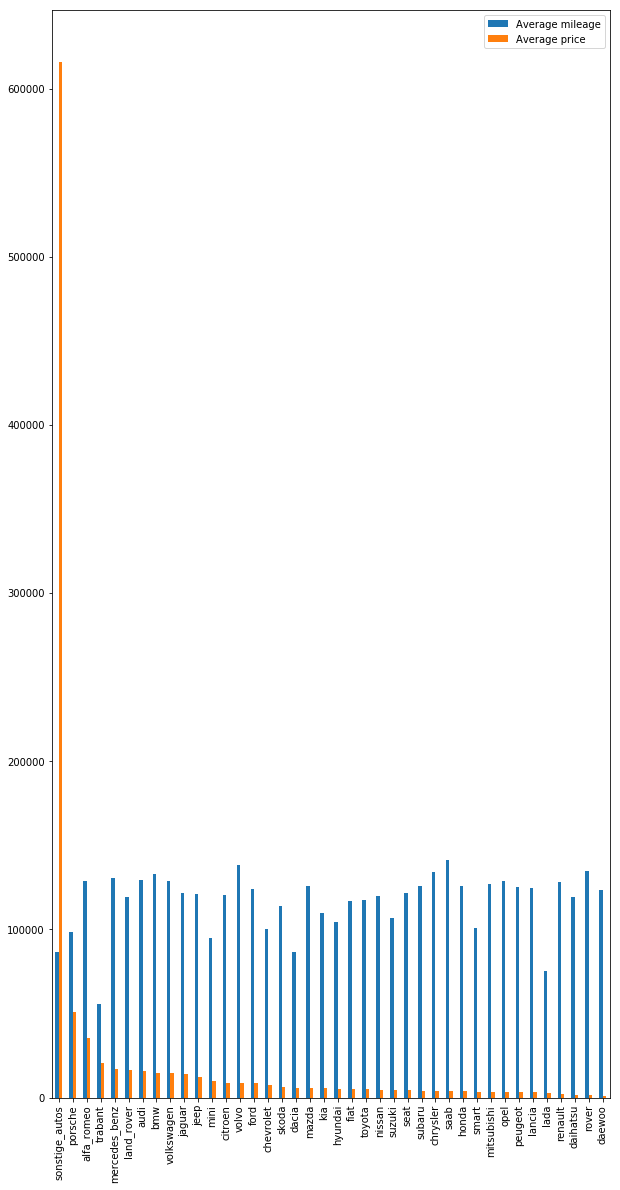

In [112]:
df_av.plot(kind="bar", figsize=(10,20))

In [113]:
autos.info()
autos["fuel_type"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_Type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
odometer              371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
ad_created            371528 non-null object
nr_of_pictures        371528 non-null int64
postal_code           371528 non-null int64
last_seen             371528 non-null obj

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng', 'elektro'], dtype=object)

In [114]:
# Count fuel type grouped by brand with python for loop instead of pandas groupby
autos["fuel_type"].unique()



array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng', 'elektro'], dtype=object)

#### Splitting the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the milage.

In [115]:
# Splitting the odometer_km into groups, and use aggregation to see if 
# average prices follows any patterns based on the milage.

# print(auto_6546.info() )

x_23 = auto_6546.groupby(['odometer_km'])['price_Dollar'].mean().sort_values()

print(type(x_23 ))
print(x_23)



<class 'pandas.core.series.Series'>
odometer_km
125000     7110.604907
90000      8508.924699
100000     9099.735113
80000     10587.735275
70000     10786.793820
60000     13090.124466
30000     15825.064062
50000     16359.294813
150000    18539.125400
40000     19355.214241
10000     22972.825552
20000     47705.554968
5000      62851.962937
Name: price_Dollar, dtype: float64


In [116]:
x_24=x_23.reset_index()

print(type(x_24))
print(x_24)

print(x_24.iloc[:,0])



<class 'pandas.core.frame.DataFrame'>
    odometer_km  price_Dollar
0        125000   7110.604907
1         90000   8508.924699
2        100000   9099.735113
3         80000  10587.735275
4         70000  10786.793820
5         60000  13090.124466
6         30000  15825.064062
7         50000  16359.294813
8        150000  18539.125400
9         40000  19355.214241
10        10000  22972.825552
11        20000  47705.554968
12         5000  62851.962937
0     125000
1      90000
2     100000
3      80000
4      70000
5      60000
6      30000
7      50000
8     150000
9      40000
10     10000
11     20000
12      5000
Name: odometer_km, dtype: int64


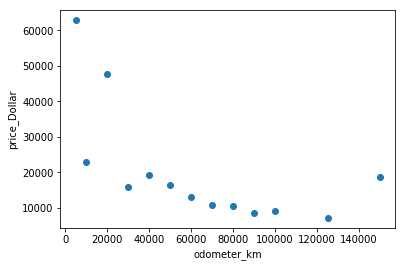

In [117]:
xx = x_24.iloc[:,0]
yy = x_24.iloc[:,1]


plt.scatter(x=xx, y=yy)
plt.xlabel("odometer_km")
plt.ylabel("price_Dollar")
plt.show()

In general the higher the mileage the lower the price. 

#### How much cheaper are cars with damage than their non-damaged counterparts?

In [118]:
autos.info()
autos['unrepaired_damage']
autos123 = autos
autos123.dropna(how='any', inplace=True)
print(autos123['unrepaired_damage'].unique())

autos123.groupby('unrepaired_damage')['price'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_Type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
odometer              371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
ad_created            371528 non-null object
nr_of_pictures        371528 non-null int64
postal_code           371528 non-null int64
last_seen             371528 non-null obj

unrepaired_damage
ja      5946.299000
nein    8480.655912
Name: price, dtype: float64

Cars with unrepaired damages are on average cheaper than non-damaged counterparts.